In [1]:
library(cowplot)
library(dplyr)
library(stringr)
library(readr)
library(tidyr)
library(lfe)
library(scales)
library(repr)
library(stargazer)
options(repr.plot.width=10, repr.plot.height=10)
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/conley_selector_matrix.Rdata')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/social_adj_matrix.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/geo_adjacency_matrix.Rdata')
source('../utils/residualizer+genAlters.R')
source("../utils/labels_and_colors.r")
source('../utils/adjacency_and_cluster_robust_inference.R')
source('../utils/geo_utils.r')
source('../utils/latex_utils.R')


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Loaded glmnet 3.0-2



Attaching package: ‘xgboost’


The following object is ma

In [2]:
model_save_location = '/nfs/sloanlab004/projects/covid_mobility_proj/models'

# Load focal only models
DiD.sp_fbrstu <- readRDS(file=str_c(model_save_location, 'did_sgnhd_focal.rds'))
out_fbrstu <- readRDS(file=str_c(model_save_location, 'did_sgnhd_focal_vcov.rds'))
DiD.sp_hd <- readRDS(file=str_c(model_save_location, 'did_fbnrstu_focal.rds'))
out_sp_hd <- readRDS(file=str_c(model_save_location, 'did_fbrnstu_focal_vcov.rds'))
DiD.sp_cbgv <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_focal.rds'))
out_sp_cbgv <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_focal_vcov.rds'))
DiD.sp_btvrc <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_focal.rds'))
out_sp_btvrc <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_focal_vcov.rds'))

# Load focal + geo models
DID.mp_go.aITT.sg_hd <- readRDS(file=str_c(model_save_location, 'did_sgnhd_geo.rds'))
out_hd_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'did_sgnhd_geo_vcov.rds'))
DID.mp_go.aITT.sg_rstu <- readRDS(file=str_c(model_save_location, 'did_fbnrstu_geo.rds'))
out_rstu_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'did_fbrnstu_geo_vcov.rds'))
DID.mp_go.aITT.sg_cbgv <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_geo.rds'))
out_cbgv_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_geo_vcov.rds'))
DID.mp_go.aITT.sg_btvrc <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_geo.rds'))
out_btvrc_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_geo_vcov.rds'))

# Load focal + geo + social models
DID.mp.aITT.sg_hd <- readRDS(file=str_c(model_save_location, 'did_sgnhd_both.rds'))  
out_hd_aitt_sg <- readRDS(file=str_c(model_save_location, 'did_sgnhd_both_vcov.rds'))
DID.mp.aITT.sg_rstu <- readRDS(file=str_c(model_save_location, 'did_fbnrstu_both.rds'))                                      
out_rstu_aitt_sg <- readRDS(file=str_c(model_save_location, 'did_fbrnstu_both_vcov.rds'))
DID.mp.aITT.sg_cbgv <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_both.rds'))                 
out_cbgv_aitt_sg <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_both_vcov.rds'))
DID.mp.aITT.sg_btvrc <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_both.rds'))          
out_btvrc_aitt_sg <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_both_vcov.rds'))

# Load focal + geo + social with interaction models
DID.mp.aITT.sg_hd_int <- readRDS(file=str_c(model_save_location, 'did_sgnhd_both_int.rds'))                          
out_hd_aitt_sg_int <- readRDS(file=str_c(model_save_location, 'did_sgnhd_both_int_vcov.rds'))
DID.mp.aITT.sg_rstu_int <- readRDS(file=str_c(model_save_location, 'did_fbnrstu_both_int.rds'))        
out_rstu_aitt_sg_int <- readRDS(file=str_c(model_save_location, 'did_fbrnstu_both_int_vcov.rds'))
DID.mp.aITT.sg_cbgv_int <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_both_int.rds'))      
out_cbgv_aitt_sg_int <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_both_int_vcov.rds'))
DID.mp.aITT.sg_btvrc_int <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_both_int.rds'))      
out_btvrc_aitt_sg_int <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_both_int_vcov.rds'))

# Load focal + geo with split in-state and out-of-state models
did_sgnhd_geo_split <- readRDS(file=str_c(model_save_location, 'did_sgnhd_geo_split.rds'))                          
out_sgnhd_geo_split <- readRDS(file=str_c(model_save_location, 'did_sgnhd_geo_split_vcov.rds'))
did_fbrnstu_geo_split <- readRDS(file=str_c(model_save_location, 'did_fbnrstu_geo_split.rds'))                          
out_fbrnstu_geo_split <- readRDS(file=str_c(model_save_location, 'did_fbrnstu_geo_split_vcov.rds'))
did_sgcbgv_geo_split <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_geo_split.rds'))     
out_sgcbgv_geo_split <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_geo_split_vcov.rds'))
did_btvrc_geo_split <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_geo_split.rds'))      
out_btvrc_geo_split <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_geo_split_vcov.rds'))

# Load focal + geo + social with split in-state and out-of-state models
did_sgnhd_both_split <- readRDS(file=str_c(model_save_location, 'did_sgnhd_both_split.rds'))                          
out_sgnhd_both_split <- readRDS(file=str_c(model_save_location, 'did_sgnhd_both_split_vcov.rds'))
did_fbrnstu_both_split <- readRDS(file=str_c(model_save_location, 'did_fbnrstu_both_split.rds'))      
out_fbrnstu_both_split <- readRDS(file=str_c(model_save_location, 'did_fbrnstu_both_split_vcov.rds'))
did_sgcbgv_both_split <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_both_split.rds'))    
out_sgcbgv_both_split <- readRDS(file=str_c(model_save_location, 'did_sgcbgv_both_split_vcov.rds'))
did_btvrc_both_split <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_both_split.rds'))     
out_btvrc_both_split <- readRDS(file=str_c(model_save_location, 'did_fbbtvrc_both_split_vcov.rds'))

In [3]:
felm.waldtest.mod(did_sgnhd_both_split, R= ~ `~ alter_sh.r + geo_alter_sh.r`, vcov=out_sgnhd_both_split$vcov.both)

ERROR: Error in formtoR(f, coefs): Can't find ~ alter_sh.r + geo_alter_sh.r among coefficients stay_home.r,geo_alter_sh_same_state.r,geo_alter_sh_diff_state.r,alter_sh_same_state.r,alter_sh_diff_state.r,ban_gmr.r,geo_alter_ban_gmr_same_state.r,geo_alter_ban_gmr_diff_state.r,alter_ban_gmr_same_state.r,alter_ban_gmr_diff_state.r


In [4]:
sqrt(diag(out_hd_aitt_sg_go$vcov))
out_hd_aitt_sg_go$ct
out_cbgv_aitt_sg_go$ct

stay_home.r   geo_alter_sh.r        ban_gmr.r geo_alter_bgmr.r 
     0.003834224      0.003972323      0.002560102      0.003429044


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
stay_home.r      -0.0201189  0.0038342 -5.2472 3.149e-06 ***
geo_alter_sh.r   -0.0275757  0.0039723 -6.9420 7.396e-09 ***
ban_gmr.r        -0.0023639  0.0025601 -0.9234   0.36024    
geo_alter_bgmr.r -0.0070121  0.0034290 -2.0449   0.04615 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
stay_home.r      -0.0408256  0.0054994 -7.4237 1.307e-09 ***
geo_alter_sh.r   -0.0478749  0.0069547 -6.8838 9.120e-09 ***
ban_gmr.r        -0.0076006  0.0035974 -2.1128   0.03963 *  
geo_alter_bgmr.r -0.0077736  0.0061882 -1.2562   0.21489    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [5]:
# Generate a table for focal policy only model
mult = 100
star <- stargazer(DiD.sp_fbrstu, DiD.sp_hd, DiD.sp_cbgv, DiD.sp_btvrc,
          covariate.labels = c('Shelter-in-place', 'Close gyms/movies/restaurants'),
          dep.var.labels = c('asinh(NSBTUs)', 'asinh(NHDF)',
                             'log(dCBGVs)', 'BTVRC'),
          coef = list(mult*coef(DiD.sp_fbrstu), mult*coef(DiD.sp_hd), 
                      mult*coef(DiD.sp_cbgv), mult*coef(DiD.sp_btvrc)),
          se = list(mult*sqrt(diag(out_fbrstu$vcov.both)), 
                    mult*sqrt(diag(out_sp_hd$vcov.both)),
                    mult*sqrt(diag(out_sp_cbgv$vcov.both)),
                    mult*sqrt(diag(out_sp_btvrc$vcov.both))),
          add.lines = list(
              c('Conley s.e.', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('County fixed effect', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes', 'Yes')),
          label='tab:diff_in_diff_no_sp',
          title='The effect of policy interventions on county-level outcomes',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{5}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} NSBTU refers to the fraction of Facebook users in a given county who visit multiple Bing tiles on a given day. NHDF refers to the fraction of devices that are not completely at home, as measured by Safegraph. dCBGVs refers to the mean number of census block groups devices from a given county visit, as measured by Safegraph. BTVRC refers to the relative change in the number of Bing tiles users visit, as measured by Facebook. All values multiplied by 100. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/diff_in_diff_no_sp.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 14, 2020 - 06:12:06 PM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on county-level outcomes} 
  \label{tab:diff_in_diff_no_sp} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & asinh(NSBTUs) & asinh(NHDF) & log(dCBGVs) & BTVRC \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 Shelter-in-place & $-$2.13$^{***}$ & $-$3.29$^{***}$ & $-$6.24$^{***}$ & $-$7.38$^{***}$ \\ 
  & (0.27) & (0.31) & (0.48) & (0.55) \\ 
  & & & & \\ 
 Close gyms/movies/restaurants & $-$0.03 & $-$0.64$^{***}$ & $-$1.22$^{***}$ & $-$1.72$^{***}$ \\ 
  & (0.17) & (0.16) & (0.29) & (0.30) \\ 
  & & & & \\ 
\hline \\[-1.8ex] 
Conley s.e. & Yes & Yes & Yes & Yes \\ 
County fixed effect & Yes & Yes & Yes & Yes \\ 
D

In [6]:
sh_index <- which(names(coefficients(DiD.sp_btvrc)) == 'stay_home.r')
gmr_index <- which(names(coefficients(DiD.sp_btvrc)) == 'ban_gmr.r')

model_coefs <- function(model_object, shi, gmri) {
    c(coef(model_object)[shi],
     coef(model_object)[gmri])
}

var_coefs <- function(output_object, shi, gmri) {
    c(output_object$vcov.both[shi, shi],
      output_object$vcov.both[gmri, gmri])
      
}


plot_df <- data.frame(outcome = as.character(c(rep('Non-Single Bing\ntile users\n(FB)', 2),
                                  rep('Non-Home device\nfraction\n(Safegraph)', 2),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 2),
                                  rep('Bing tiles\nvisited per\n device (FB)', 2))),
                      coef = c(model_coefs(DiD.sp_fbrstu, sh_index, gmr_index),
                               model_coefs(DiD.sp_hd, sh_index, gmr_index),
                               model_coefs(DiD.sp_cbgv, sh_index, gmr_index),
                               model_coefs(DiD.sp_btvrc, sh_index, gmr_index)),
                      log = c(rep(1, 6), rep(0, 2)),
                      var = c(var_coefs(out_fbrstu, sh_index, gmr_index),
                             var_coefs(out_sp_hd, sh_index, gmr_index),
                             var_coefs(out_sp_cbgv, sh_index, gmr_index),
                             var_coefs(out_sp_btvrc, sh_index, gmr_index)),
                      policy = rep(c('Shelter-in-place', 
                                       'Close gyms,\nmovie theaters,\nrestaurants'), 4))

In [ ]:
direct_dd_results_df <- plot_df %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = round(100*ifelse(log == 1, exp(coef) - 1, coef), 2),
         lb = round(100*ifelse(log == 1, exp(lb) - 1, lb), 2),
        ub = round(100*ifelse(log == 1, exp(ub) - 1, ub), 2))

direct_dd_results_df

In [ ]:
out.file <- "../output/numerical_results.tex"
addParam <- genParamAdder(out.file)

direct_dd_effect_nhd <- abs((direct_dd_results_df %>% 
  filter(as.character(policy) == 'Shelter-in-place' & str_detect(as.character(outcome), 'fraction')))$coef)
direct_dd_effect_cbgv <- abs((direct_dd_results_df %>% 
  filter(as.character(policy) == 'Shelter-in-place' & str_detect(as.character(outcome), 'block')))$coef)


addParam("\\dddirecteffectnhd", formatParamString(direct_dd_effect_nhd))
addParam("\\dddirecteffectcbgv", formatParamString(direct_dd_effect_cbgv))

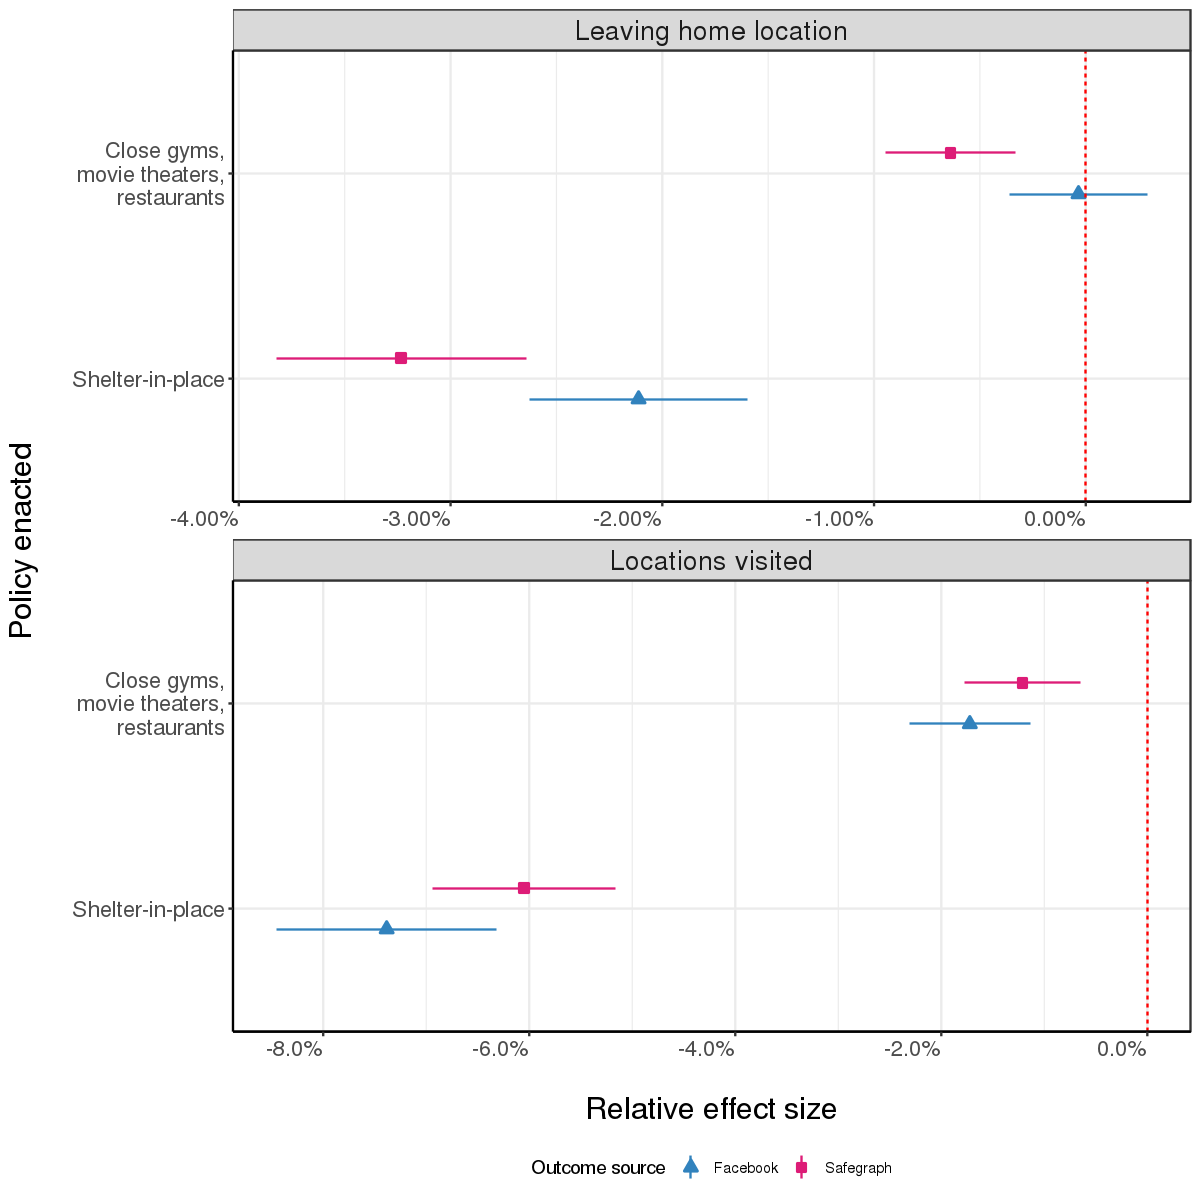

In [7]:
plot_df <- plot_df %>%
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )

diff_in_diff_sp_plot <- plot_df %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Shelter-in-place',
                                                       'Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Ban gatherings'))) %>%
  ggplot(., aes(
      x=coef, y=policy, xmin=lb, xmax=ub,
      color=outcome_source, shape=outcome_source,
      fill = outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = 'Outcome source', values = outcome_source_colors) +
  facet_wrap(outcome_type ~ ., scales='free_x', nrow= 2) +
  theme(axis.text.x = element_text(hjust = 1, size=13),
        axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        #strip.text.x = element_blank(),
        #strip.text.y = element_text(size=16),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        #strip.placement.y='top',
        #strip.background=element_blank(),
        strip.text.x.top = element_text(size=16),
        legend.position="bottom"
       ) + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n')
diff_in_diff_sp_plot

In [8]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_sp_plot.pdf"),
  plot = diff_in_diff_sp_plot,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 5,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [9]:
# Generate a table for models with focal and geo
mult = 100
star <- stargazer(DID.mp_go.aITT.sg_rstu, DID.mp_go.aITT.sg_hd, DID.mp_go.aITT.sg_cbgv, DID.mp_go.aITT.sg_btvrc,
          covariate.labels = c('Ego shelter-in-place', 'Geo-alter shelter-in-place', 
                               'Ego close gyms/movies/restaurants', 'Geo-alter close gyms/movies/restaurants'),
          dep.var.labels = c('asinh(NSBTUs)', 'asinh(NHDF)',
                             'log(dCBGVs)', 'BTVRC'),
          coef = list(mult*coef(DID.mp_go.aITT.sg_rstu), mult*coef(DID.mp_go.aITT.sg_hd), 
                      mult*coef(DID.mp_go.aITT.sg_cbgv), mult*coef(DID.mp_go.aITT.sg_btvrc)),
          se = list(mult*sqrt(diag(out_rstu_aitt_sg_go$vcov.both)), 
                    mult*sqrt(diag(out_hd_aitt_sg_go$vcov.both)),
                    mult*sqrt(diag(out_cbgv_aitt_sg_go$vcov.both)),
                    mult*sqrt(diag(out_btvrc_aitt_sg_go$vcov.both))),
          add.lines = list(
              c('Conley s.e.', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('County fixed effect', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes', 'Yes')),
          label='tab:diff_in_diff_with_sp_geo',
          title='The effect of policy interventions on county-level outcomes, including geo-spillovers.',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{5}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} NSBTU refers to the fraction of Facebook users in a given county who visit multiple Bing tiles on a given day. NHDF refers to the fraction of devices that are not completely at home, as measured by Safegraph. dCBGVs refers to the mean number of census block groups devices from a given county visit, as measured by Safegraph. BTVRC refers to the relative change in the number of Bing tiles users visit, as measured by Facebook. All values multiplied by 100. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/diff_in_diff_with_sp_geo.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 14, 2020 - 06:12:08 PM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on county-level outcomes, including geo-spillovers.} 
  \label{tab:diff_in_diff_with_sp_geo} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & asinh(NSBTUs) & asinh(NHDF) & log(dCBGVs) & BTVRC \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 Ego shelter-in-place & $-$2.08$^{***}$ & $-$2.01$^{***}$ & $-$4.08$^{***}$ & $-$5.60$^{***}$ \\ 
  & (0.27) & (0.38) & (0.55) & (0.66) \\ 
  & & & & \\ 
 Geo-alter shelter-in-place & $-$0.50 & $-$2.76$^{***}$ & $-$4.79$^{***}$ & $-$4.09$^{***}$ \\ 
  & (0.34) & (0.40) & (0.70) & (0.79) \\ 
  & & & & \\ 
 Ego close gyms/movies/restaurants & $-$0.77$^{***}$ & $-$0.24 & $-$0.76$^

In [10]:
sh_index <- which(names(coefficients(DID.mp_go.aITT.sg_rstu)) == 'stay_home.r')
gmr_index <- which(names(coefficients(DID.mp_go.aITT.sg_rstu)) == 'ban_gmr.r')
sh_geo_index <- which(names(coefficients(DID.mp_go.aITT.sg_rstu)) == 'geo_alter_sh.r')
gmr_geo_index <- which(names(coefficients(DID.mp_go.aITT.sg_rstu)) == 'geo_alter_bgmr.r')

plot_df_geo_spillovers <- data.frame(outcome = rep(c(rep('Non-Single Bing\ntile users\n(FB)', 2),
                                  rep('Non-Home device\nfraction\n(Safegraph)', 2),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 2),
                                  rep('Bing tiles\nvisited per\n device (FB)', 2)), 2),
                      coef = c(model_coefs(DID.mp_go.aITT.sg_rstu, sh_index, gmr_index),
                               model_coefs(DID.mp_go.aITT.sg_hd, sh_index, gmr_index),
                               model_coefs(DID.mp_go.aITT.sg_cbgv, sh_index, gmr_index),
                               model_coefs(DID.mp_go.aITT.sg_btvrc, sh_index, gmr_index),
                               model_coefs(DID.mp_go.aITT.sg_rstu, sh_geo_index, gmr_geo_index),                               
                               model_coefs(DID.mp_go.aITT.sg_hd, sh_geo_index, gmr_geo_index),                               
                               model_coefs(DID.mp_go.aITT.sg_cbgv, sh_geo_index, gmr_geo_index),                                                              
                               model_coefs(DID.mp_go.aITT.sg_btvrc, sh_geo_index, gmr_geo_index)
                              ), 
                      log = rep(c(rep(1, 6), rep(0, 2)), 2),
                      var = c(var_coefs(out_rstu_aitt_sg_go, sh_index, gmr_index),
                              var_coefs(out_hd_aitt_sg_go, sh_index, gmr_index),
                              var_coefs(out_cbgv_aitt_sg_go, sh_index, gmr_index),
                              var_coefs(out_btvrc_aitt_sg_go, sh_index, gmr_index),
                              var_coefs(out_rstu_aitt_sg_go, sh_geo_index, gmr_geo_index),
                              var_coefs(out_hd_aitt_sg_go, sh_geo_index, gmr_geo_index),
                              var_coefs(out_cbgv_aitt_sg_go, sh_geo_index, gmr_geo_index),
                              var_coefs(out_btvrc_aitt_sg_go, sh_geo_index, gmr_geo_index)
                             ),
                      policy = rep(c('Shelter-in-place', 
                                   'Close gyms,\nmovie theaters,\nrestaurants'), 8),
                     subject = c(rep('Own county', 8), rep('Geographic\nconnections', 8)))

In [ ]:
geo_spillovers_results_df <- plot_df_geo_spillovers %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = round(100*ifelse(log == 1, exp(coef) - 1, coef), 2),
         lb = round(100*ifelse(log == 1, exp(lb) - 1, lb), 2),
        ub = round(100*ifelse(log == 1, exp(ub) - 1, ub), 2))
geo_spillovers_results_df

In [ ]:
geo_spillover_direct_cbgv <- abs((geo_spillovers_results_df %>% filter(str_detect(as.character(subject), 'Own') & 
                                                                   str_detect(as.character(policy), 'Shelter') & 
                                                                   str_detect(as.character(outcome), 'block')))$coef)
geo_spillover_direct_nhd <- abs((geo_spillovers_results_df %>% 
                                 filter(str_detect(as.character(subject), 'Own') & 
                                        str_detect(as.character(policy), 'Shelter') & 
                                        str_detect(as.character(outcome), 'fraction')))$coef)
geo_spillover_half_geo_nhd <- abs(.5*(geo_spillovers_results_df %>% 
                                  filter(str_detect(as.character(subject), 'Geographic') & 
                                         str_detect(as.character(policy), 'Shelter') & 
                                         str_detect(as.character(outcome), 'fraction')))$coef)
geo_spillover_half_geo_cbgv <- abs(.5*(geo_spillovers_results_df %>% 
                                  filter(str_detect(as.character(subject), 'Geographic') & 
                                         str_detect(as.character(policy), 'Shelter') & 
                                         str_detect(as.character(outcome), 'block')))$coef)

addParam("\\ddgeodirectnhd", formatParamString(geo_spillover_direct_nhd))
addParam("\\ddgeodirectcbgv", formatParamString(geo_spillover_direct_cbgv))
addParam("\\ddgeohalfgeonhd", formatParamString(geo_spillover_half_geo_nhd))
addParam("\\ddgeohalfgeocbgv", formatParamString(geo_spillover_half_geo_cbgv))

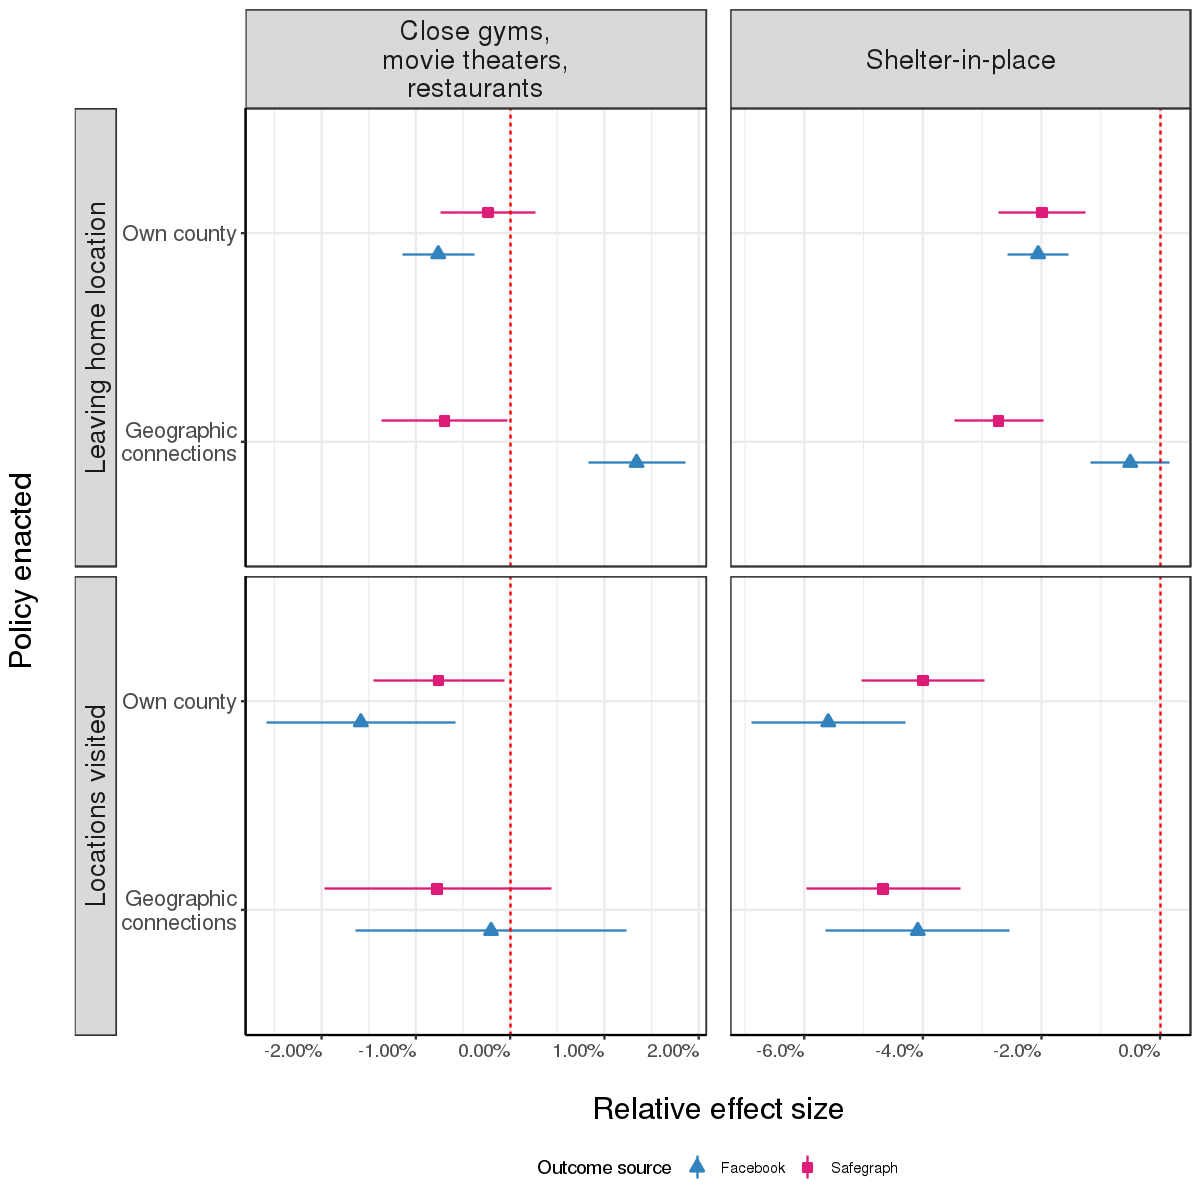

In [11]:
plot_df_geo_spillovers <- plot_df_geo_spillovers %>%
   
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )

diff_in_diff_mp_plot_itt_geo <- plot_df_geo_spillovers %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill = outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = 'Outcome source', values = outcome_source_colors) + 
  facet_grid(outcome_type~policy, scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n')
diff_in_diff_mp_plot_itt_geo

In [12]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_mp_plot_itt_geo.pdf"),
  plot = diff_in_diff_mp_plot_itt_geo,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 5,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [13]:
# Generate a table for adjacent county models
mult = 100
star <- stargazer(DID.mp.aITT.sg_rstu, DID.mp.aITT.sg_hd, DID.mp.aITT.sg_cbgv, DID.mp.aITT.sg_btvrc,
          covariate.labels = c('Ego shelter-in-place', 'Social-alter shelter-in-place', 'Geo-alter shelter-in-place', 
                               'Ego close gyms/movies/restaurants', 'Social-alter close gyms/movies/restaurants', 
                               'Geo-alter close gyms/movies/restaurants'),
          dep.var.labels = c('asinh(SBTUs)', 'asinh(HDF)',
                             'log(dCBGVs)', 'BTVRC'),
          coef = list(mult*coef(DID.mp.aITT.sg_rstu), mult*coef(DID.mp.aITT.sg_hd), 
                      mult*coef(DID.mp.aITT.sg_cbgv), mult*coef(DID.mp.aITT.sg_btvrc)),
          se = list(mult*sqrt(diag(out_rstu_aitt_sg$vcov.both)), 
                    mult*sqrt(diag(out_hd_aitt_sg$vcov.both)),
                    mult*sqrt(diag(out_cbgv_aitt_sg$vcov.both)),
                    mult*sqrt(diag(out_btvrc_aitt_sg$vcov.both))),
          add.lines = list(
              c('Conley s.e.', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('County fixed effect', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes', 'Yes')),
          label='tab:diff_in_diff_with_sp',
          title='The effect of policy interventions on county-level outcomes, including geo- and social-spillovers.',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{5}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} SBTU refers to the fraction of Facebook users in a given county who visit only one Bing tile on a given day. HDF refers to the fraction of devices completely at home, as measured by Safegraph. dCBGVs refers to the mean number of census block groups devices from a given county visit, as measured by Safegraph. BTVRC refers to the relative change in the number of Bing tiles users visit, as measured by Facebook. All values multiplied by 100. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/diff_in_diff_with_sp.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 14, 2020 - 06:12:09 PM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on county-level outcomes, including geo- and social-spillovers.} 
  \label{tab:diff_in_diff_with_sp} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & asinh(SBTUs) & asinh(HDF) & log(dCBGVs) & BTVRC \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 Ego shelter-in-place & $-$0.78$^{*}$ & $-$1.26$^{**}$ & $-$2.73$^{**}$ & $-$1.86$^{*}$ \\ 
  & (0.46) & (0.57) & (1.31) & (1.02) \\ 
  & & & & \\ 
 Social-alter shelter-in-place & $-$6.61$^{***}$ & $-$3.98$^{**}$ & $-$6.95$^{*}$ & $-$18.82$^{***}$ \\ 
  & (1.33) & (1.69) & (3.80) & (2.86) \\ 
  & & & & \\ 
 Geo-alter shelter-in-place & 2.21$^{***}$ & $-$1.08 & $-$1.92 & 

In [14]:
sh_index <- which(names(coefficients(DID.mp.aITT.sg_btvrc)) == 'stay_home.r')
gmr_index <- which(names(coefficients(DID.mp.aITT.sg_btvrc)) == 'ban_gmr.r')
sh_alter_index <- which(names(coefficients(DID.mp.aITT.sg_btvrc)) == 'alter_sh.r')
gmr_alter_index <- which(names(coefficients(DID.mp.aITT.sg_btvrc)) == 'alter_bgmr.r')
sh_geo_index <- which(names(coefficients(DID.mp.aITT.sg_btvrc)) == 'geo_alter_sh.r')
gmr_geo_index <- which(names(coefficients(DID.mp.aITT.sg_btvrc)) == 'geo_alter_bgmr.r')

plot_df_spillovers <- data.frame(outcome = rep(c(rep('Non-Single Bing\ntile users\n(FB)', 2),
                                  rep('Non-Home device\nfraction\n(Safegraph)', 2),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 2),
                                  rep('Bing tiles\nvisited per\n device (FB)', 2)), 3),
                      coef = c(model_coefs(DID.mp.aITT.sg_rstu, sh_index, gmr_index),
                               model_coefs(DID.mp.aITT.sg_hd, sh_index, gmr_index),
                               model_coefs(DID.mp.aITT.sg_cbgv, sh_index, gmr_index),
                               model_coefs(DID.mp.aITT.sg_btvrc, sh_index, gmr_index),
                               model_coefs(DID.mp.aITT.sg_rstu, sh_alter_index, gmr_alter_index),                               
                               model_coefs(DID.mp.aITT.sg_hd, sh_alter_index, gmr_alter_index),                               
                               model_coefs(DID.mp.aITT.sg_cbgv, sh_alter_index, gmr_alter_index),                                                              
                               model_coefs(DID.mp.aITT.sg_btvrc, sh_alter_index, gmr_alter_index),
                               model_coefs(DID.mp.aITT.sg_rstu, sh_geo_index, gmr_geo_index),                               
                               model_coefs(DID.mp.aITT.sg_hd, sh_geo_index, gmr_geo_index),                               
                               model_coefs(DID.mp.aITT.sg_cbgv, sh_geo_index, gmr_geo_index),                                                              
                               model_coefs(DID.mp.aITT.sg_btvrc, sh_geo_index, gmr_geo_index)
                              ), 
                      log = rep(c(rep(1, 6), rep(0, 2)), 3),
                      var = c(var_coefs(out_rstu_aitt_sg, sh_index, gmr_index),
                              var_coefs(out_hd_aitt_sg, sh_index, gmr_index),
                              var_coefs(out_cbgv_aitt_sg, sh_index, gmr_index),
                              var_coefs(out_btvrc_aitt_sg, sh_index, gmr_index),
                              var_coefs(out_rstu_aitt_sg, sh_alter_index, gmr_alter_index),
                              var_coefs(out_hd_aitt_sg, sh_alter_index, gmr_alter_index),
                              var_coefs(out_cbgv_aitt_sg, sh_alter_index, gmr_alter_index),
                              var_coefs(out_btvrc_aitt_sg, sh_alter_index, gmr_alter_index),
                              var_coefs(out_rstu_aitt_sg, sh_geo_index, gmr_geo_index),
                              var_coefs(out_hd_aitt_sg, sh_geo_index, gmr_geo_index),
                              var_coefs(out_cbgv_aitt_sg, sh_geo_index, gmr_geo_index),
                              var_coefs(out_btvrc_aitt_sg, sh_geo_index, gmr_geo_index)
                             ),
                      policy = rep(c('Shelter-in-place', 
                                   'Close gyms,\nmovie theaters,\nrestaurants'), 12),
                     subject = c(rep('Own county', 8), rep('Social\nconnections', 8),
                                rep('Geographic\nconnections', 8)))

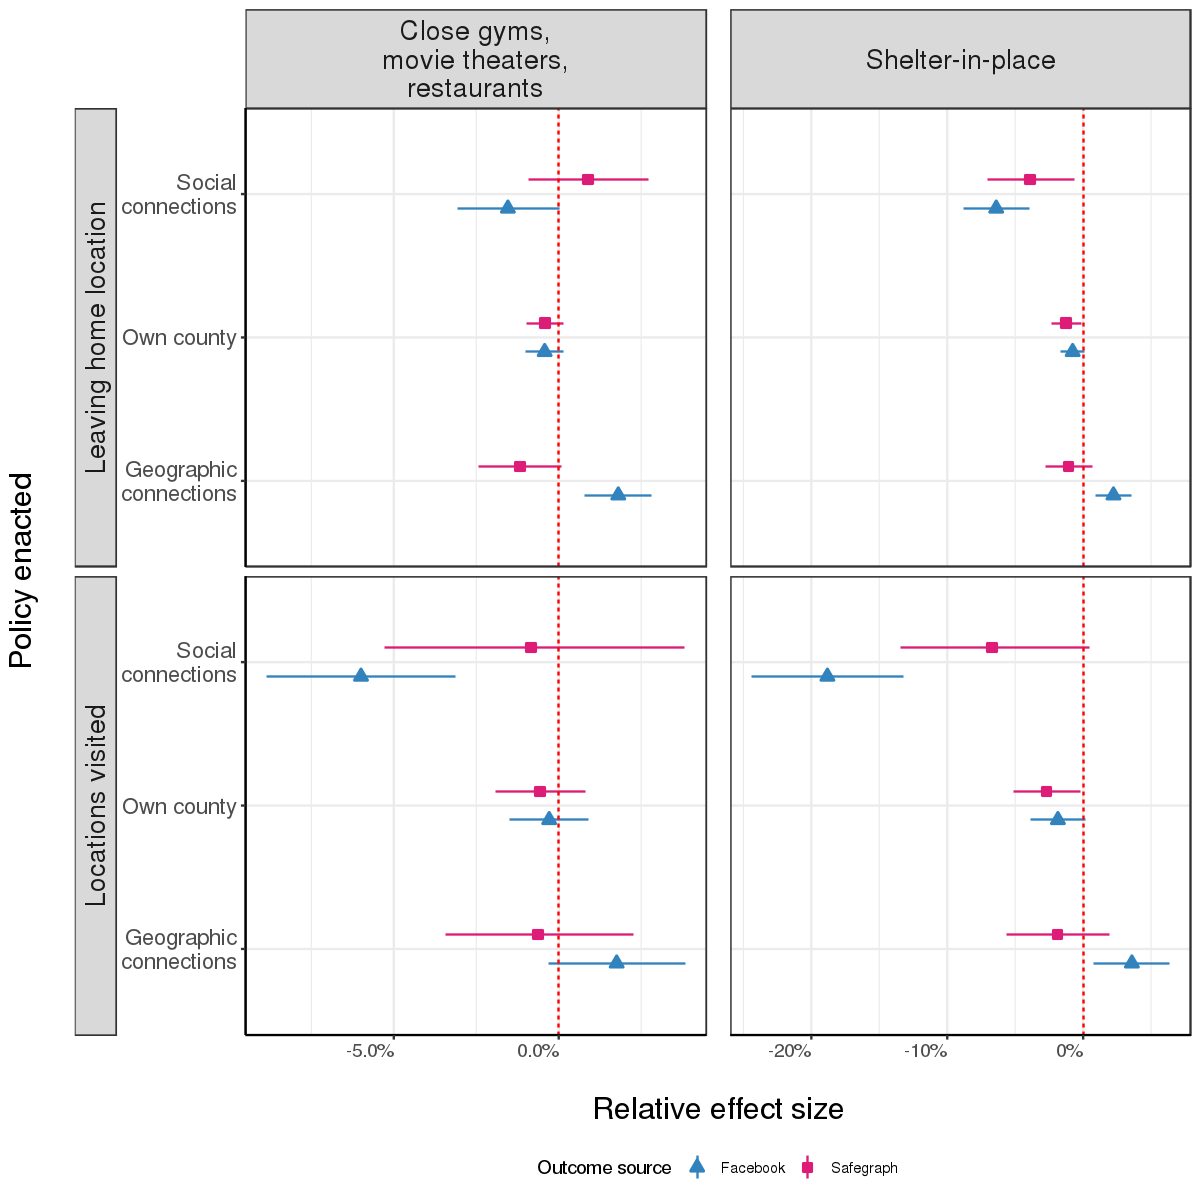

In [15]:
plot_df_spillovers <- plot_df_spillovers %>%
   
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )

diff_in_diff_mp_plot_itt <- plot_df_spillovers %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Ban gatherings',
                                                       'Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill = outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = 'Outcome source', values = outcome_source_colors) + 
  facet_grid(outcome_type~policy, scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n')
diff_in_diff_mp_plot_itt

In [16]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_mp_plot_itt.pdf"),
  plot = diff_in_diff_mp_plot_itt,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7.5,
  height = 6,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [17]:
# Generate a table for geo + social + interacted model
mult = 100
star <- stargazer(DID.mp.aITT.sg_rstu_int, DID.mp.aITT.sg_hd_int, DID.mp.aITT.sg_cbgv_int, DID.mp.aITT.sg_btvrc_int,
          covariate.labels = c('Ego close gym/movies/restaurants',
                               'Social-alter close gyms/movies/restaurants',
                               'Geo-alter close gyms/movies/restaurants',
                               'Ego shelter-in-place',
                               'Social-alter shelter-in-place',
                               'Geo-alter shelter-in-place',
                               'Ego $\\times$ Social-alter close G/M/R',
                               'Ego $\\times$ Geo-alter close G/M/R',
                               'Ego $\\times$ Social-alter shelter-in-place',
                               'Ego $\\times$ Geo-alter shelter-in-place'),
          dep.var.labels = c('asinh(NSBTUs)', 'asinh(NHDF)',
                             'log(dCBGVs)', 'BTVRC'),
          coef = list(mult*coef(DID.mp.aITT.sg_rstu_int), mult*coef(DID.mp.aITT.sg_hd_int), 
                      mult*coef(DID.mp.aITT.sg_cbgv_int), mult*coef(DID.mp.aITT.sg_btvrc_int)),
          se = list(mult*sqrt(diag(out_rstu_aitt_sg_int$vcov.both)),
                    mult*sqrt(diag(out_hd_aitt_sg_int$vcov.both)),
                    mult*sqrt(diag(out_cbgv_aitt_sg_int$vcov.both)),
                    mult*sqrt(diag(out_btvrc_aitt_sg_int$vcov.both))),
          add.lines = list(
              c('Conley s.e.', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('County fixed effect', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes', 'Yes')),
          label='tab:diff_in_diff_with_sp_int',
          title='The effect of policy interventions on county-level outcomes, including geo- and social-spillovers and ego-alter policy interactions.',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{5}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} SBTU refers to the fraction of Facebook users in a given county who visit only one Bing tile on a given day. HDF refers to the fraction of devices completely at home, as measured by Safegraph. dCBGVs refers to the mean number of census block groups devices from a given county visit, as measured by Safegraph. BTVRC refers to the relative change in the number of Bing tiles users visit, as measured by Facebook. All values multiplied by 100. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/diff_in_diff_with_sp_int.tex')
summary(DID.mp.aITT.sg_rstu_int)
# summary(DID.mp.aITT.sg_hd_int)
# summary(DID.mp.aITT.sg_cbgv_int)
# summary(DID.mp.aITT.sg_btvrc_int)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 14, 2020 - 06:12:10 PM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on county-level outcomes, including geo- and social-spillovers and ego-alter policy interactions.} 
  \label{tab:diff_in_diff_with_sp_int} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & asinh(NSBTUs) & asinh(NHDF) & log(dCBGVs) & BTVRC \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 Ego close gym/movies/restaurants & $-$0.36 & $-$0.21 & $-$0.53 & $-$0.12 \\ 
  & (0.32) & (0.35) & (0.63) & (0.66) \\ 
  & & & & \\ 
 Social-alter close gyms/movies/restaurants & $-$2.16$^{***}$ & $-$0.38 & $-$1.55 & $-$7.21$^{***}$ \\ 
  & (0.75) & (0.91) & (2.01) & (1.52) \\ 
  & & & & \\ 
 Geo-alter close gyms/movies/restaurants


Call:
   felm(formula = asinh_fb_rnstu.r ~ 0 + ban_gmr.r * (alter_bgmr.r +      geo_alter_bgmr.r) + stay_home.r * (alter_sh.r + geo_alter_sh.r) |      county_fips + ds | 0 | state_abbv, data = panel, weights = panel$n,      keepCX = T) 

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-168.762   -2.866    0.148    2.879  148.396 

Coefficients:
                            Estimate Cluster s.e. t value Pr(>|t|)   
ban_gmr.r                  -0.003643     0.003089  -1.179  0.24379   
alter_bgmr.r               -0.021635     0.011747  -1.842  0.07146 . 
geo_alter_bgmr.r            0.019312     0.008504   2.271  0.02749 * 
stay_home.r                -0.006806     0.004925  -1.382  0.17314   
alter_sh.r                 -0.070185     0.021495  -3.265  0.00198 **
geo_alter_sh.r              0.019484     0.010252   1.901  0.06313 . 
ban_gmr.r:alter_bgmr.r     -0.026892     0.014459  -1.860  0.06879 . 
ban_gmr.r:geo_alter_bgmr.r  0.020002     0.010811   1.850  0.07021 . 
stay

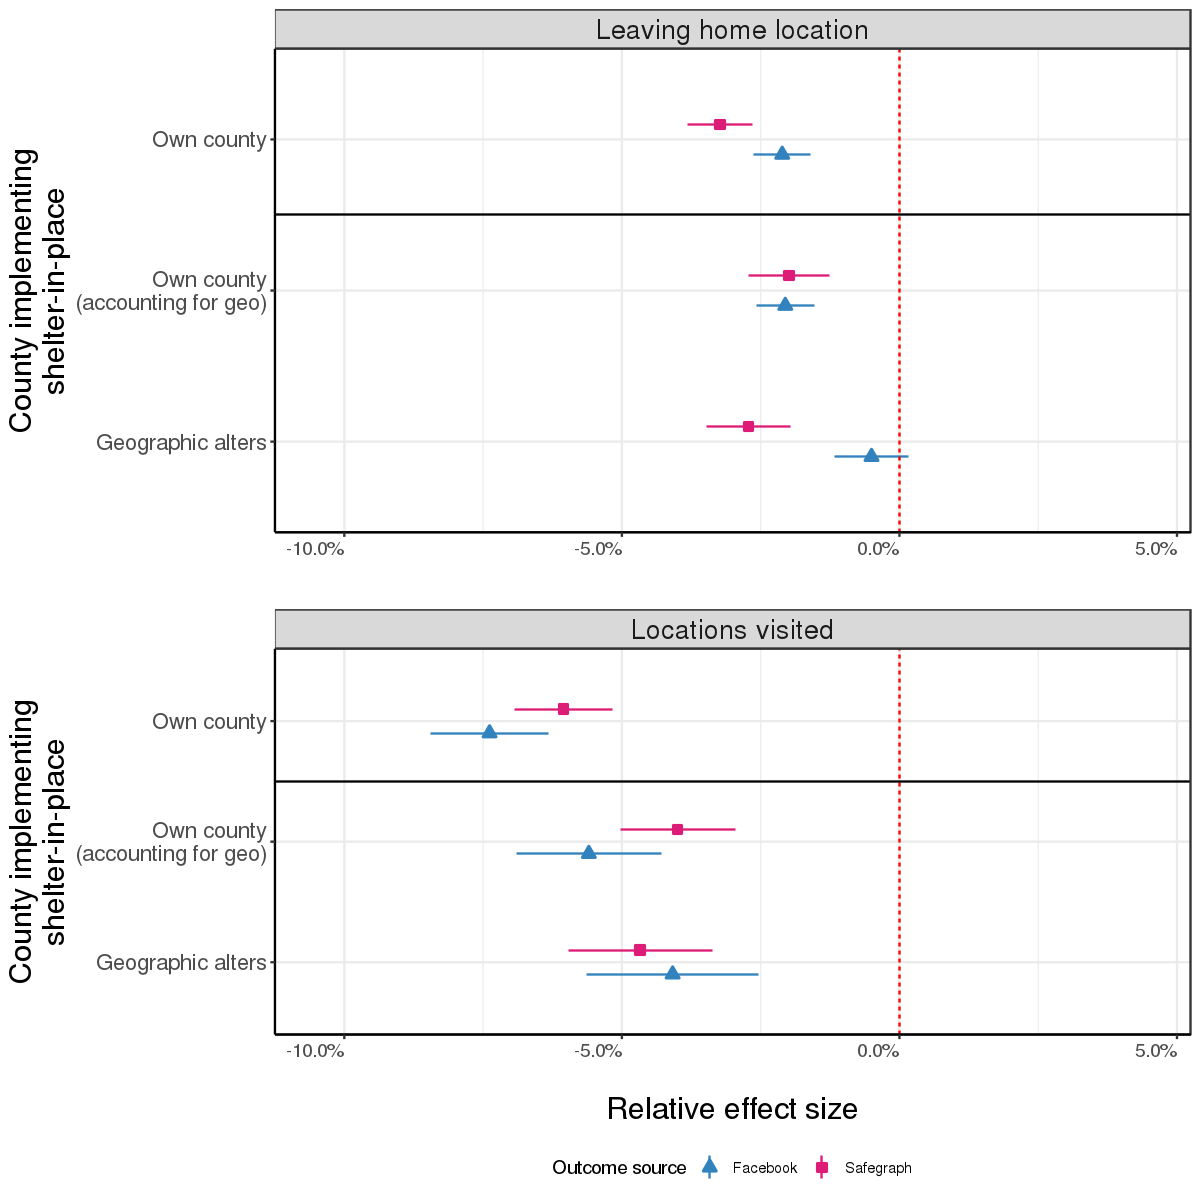

In [18]:
# Generate plot for main text 
limits <- c(-.105, .045)

lv <- rbind(plot_df %>% mutate(subject = 'Own county',
                         model = 'Ego Policies Only') %>%
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model),
      plot_df_geo_spillovers %>% mutate(subject = ifelse(subject == 'Own county', 
                                                         'Own county\n(accounting for geo)', 'Geographic alters'),
          model = 'Ego and Geographic Alter Policies') %>% 
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model)) %>% 
      filter(outcome_type == 'Locations visited') %>%
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Ban gatherings',
                                                       'Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  mutate(subject = factor(subject, ordered=TRUE, levels=c('Geographic alters',
                                                          'Own county\n(accounting for geo)',
                                                          'Own county'
                                                        ))) %>%
  filter(policy == 'Shelter-in-place') %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill=outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = 'Outcome source', values = outcome_source_colors) +
  facet_grid(~outcome_type, switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent, lim=limits) +
  xlab('\nRelative effect size') +
  ylab(str_wrap('County implementing shelter-in-place', 26)) + 
  geom_hline(yintercept = 2.5, col='black')

lhl <- rbind(plot_df %>% mutate(subject = 'Own county',
                         model = 'Ego Policies Only') %>%
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model),
      plot_df_geo_spillovers %>% mutate(subject = ifelse(subject == 'Own county', 
                                                         'Own county\n(accounting for geo)', 'Geographic alters'),
          model = 'Ego and Geographic Alter Policies') %>% 
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model)) %>% 
      filter(outcome_type == 'Leaving home location') %>%
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Ban gatherings',
                                                       'Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  mutate(subject = factor(subject, ordered=TRUE, levels=c('Geographic alters',
                                                          'Own county\n(accounting for geo)',
                                                          'Own county'
                                                        ))) %>%
  filter(policy == 'Shelter-in-place') %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill=outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = 'Outcome source', values = outcome_source_colors) + 
  facet_grid(~outcome_type, switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="none",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent, lim=limits) +
  ylab(str_wrap('County implementing shelter-in-place', 26)) + 
  xlab('') +
  geom_hline(yintercept = 2.5, col='black')

main_figure <- plot_grid(lhl, lv, ncol=1)
main_figure

In [19]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_geo_compare_main.pdf"),
  plot = main_figure,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7.5,
  height = 10,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [20]:
coef(did_sgnhd_geo_split)

stay_home.r      geo_alter_sh_same_state.r 
                  -0.027071056                   -0.007471485 
     geo_alter_sh_diff_state.r                      ban_gmr.r 
                  -0.039308004                   -0.008609443 
geo_alter_ban_gmr_same_state.r geo_alter_ban_gmr_diff_state.r 
                   0.002643104                   -0.005466128

In [21]:
# Generate a table for geo split model
mult = 100
star <- stargazer(did_fbrnstu_geo_split, did_sgnhd_geo_split, did_sgcbgv_geo_split, did_btvrc_geo_split,
          covariate.labels = c('Ego shelter-in-place',
                               'In-state geo-alter shelter-in-place',
                               'Out-of-state geo-alter shelter-in-place',
                               'Ego close gym/movies/restaurants',
                               'In-state geo-alter close gyms/movies/restaurants',                               
                               'Out-of-state geo-alter close gyms/movies/restaurants'),
          dep.var.labels = c('asinh(NSBTUs)', 'asinh(NHDF)',
                             'log(dCBGVs)', 'BTVRC'),
          coef = list(mult*coef(did_fbrnstu_geo_split), mult*coef(did_sgnhd_geo_split), 
                      mult*coef(did_sgcbgv_geo_split), mult*coef(did_btvrc_geo_split)),
          se = list(mult*sqrt(diag(out_fbrnstu_geo_split$vcov.both)),
                    mult*sqrt(diag(out_sgnhd_geo_split$vcov.both)),
                    mult*sqrt(diag(out_sgcbgv_geo_split$vcov.both)),
                    mult*sqrt(diag(out_btvrc_geo_split$vcov.both))),
          add.lines = list(
              c('Conley s.e.', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('County fixed effect', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes', 'Yes')),
          label='tab:diff_in_diff_geo_split_state',
          title='The effect of policy interventions on county-level outcomes, including in-state and out-of-state geo-spillovers.',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{5}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} SBTU refers to the fraction of Facebook users in a given county who visit only one Bing tile on a given day. HDF refers to the fraction of devices completely at home, as measured by Safegraph. dCBGVs refers to the mean number of census block groups devices from a given county visit, as measured by Safegraph. BTVRC refers to the relative change in the number of Bing tiles users visit, as measured by Facebook. All values multiplied by 100. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/diff_in_diff_geo_split_state.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 14, 2020 - 06:12:11 PM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on county-level outcomes, including in-state and out-of-state geo-spillovers.} 
  \label{tab:diff_in_diff_geo_split_state} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & asinh(NSBTUs) & asinh(NHDF) & log(dCBGVs) & BTVRC \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 Ego shelter-in-place & $-$1.92$^{***}$ & $-$2.71$^{***}$ & $-$3.67$^{***}$ & $-$5.37$^{***}$ \\ 
  & (0.71) & (0.57) & (0.95) & (1.65) \\ 
  & & & & \\ 
 In-state geo-alter shelter-in-place & $-$0.32 & $-$0.75 & $-$3.10$^{***}$ & $-$2.50 \\ 
  & (0.62) & (0.52) & (0.97) & (1.61) \\ 
  & & & & \\ 
 Out-of-state geo-alter shelter-in-place & $-$2.81$

In [22]:
sh_index <- which(names(coefficients(did_sgnhd_geo_split)) == 'stay_home.r')
gmr_index <- which(names(coefficients(did_sgnhd_geo_split)) == 'ban_gmr.r')
sh_geo_index_same <- which(names(coefficients(did_sgnhd_geo_split)) == 'geo_alter_sh_same_state.r')
sh_geo_index_diff<- which(names(coefficients(did_sgnhd_geo_split)) == 'geo_alter_sh_diff_state.r')
gmr_geo_index_same <- which(names(coefficients(did_sgnhd_geo_split)) == 'geo_alter_ban_gmr_same_state.r')
gmr_geo_index_diff <- which(names(coefficients(did_sgnhd_geo_split)) == 'geo_alter_ban_gmr_diff_state.r')

model_coefs.combine_own_state <- function(model_object, shi_o, gmri_o, shi_i, gmri_i) {
    c(coef(model_object)[shi_o] + coef(model_object)[shi_i],
     coef(model_object)[gmri_o] + coef(model_object)[gmri_i])
}

var_coefs.combine_own_state <- function(output_object, shi_o, gmri_o, shi_i, gmri_i) {
    c(output_object$vcov.both[shi_o, shi_o] + output_object$vcov.both[shi_i, shi_i] + 
      2*output_object$vcov.both[shi_i, shi_o],
      output_object$vcov.both[gmri_o, gmri_o] + output_object$vcov.both[gmri_i, gmri_i] + 
     2*output_object$vcov.both[gmri_o, gmri_i])
      
}

plot_df_spillovers_diff <- data.frame(outcome = rep(c(rep('Non-Single Bing\ntile users\n(FB)', 2),
                                  rep('Non-Home device\nfraction\n(Safegraph)', 2),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 2),
                                  rep('Bing tiles\nvisited per\n device (FB)', 2)), 2),
                      coef = c(model_coefs.combine_own_state(did_fbrnstu_geo_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same),
                               model_coefs.combine_own_state(did_sgnhd_geo_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same),
                               model_coefs.combine_own_state(did_sgcbgv_geo_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same),
                               model_coefs.combine_own_state(did_btvrc_geo_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same),
                               model_coefs(did_fbrnstu_geo_split, sh_geo_index_diff, gmr_geo_index_diff),                               
                               model_coefs(did_sgnhd_geo_split, sh_geo_index_diff, gmr_geo_index_diff),                               
                               model_coefs(did_sgcbgv_geo_split, sh_geo_index_diff, gmr_geo_index_diff),                                                              
                               model_coefs(did_btvrc_geo_split, sh_geo_index_diff, gmr_geo_index_diff)
                              ), 
                      log = rep(c(rep(1, 6), rep(0, 2)), 2),
                      var = c(var_coefs.combine_own_state(out_fbrnstu_geo_split, sh_index, gmr_index,
                                       sh_geo_index_same, gmr_geo_index_same),
                              var_coefs.combine_own_state(out_sgnhd_geo_split, sh_index, gmr_index,
                                       sh_geo_index_same, gmr_geo_index_same),
                              var_coefs.combine_own_state(out_sgcbgv_geo_split, sh_index, gmr_index,
                                       sh_geo_index_same, gmr_geo_index_same),
                              var_coefs.combine_own_state(out_btvrc_geo_split, sh_index, gmr_index,
                                       sh_geo_index_same, gmr_geo_index_same),
                              var_coefs(out_fbrnstu_geo_split, 
                                                          sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_sgnhd_geo_split, 
                                                          sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_sgcbgv_geo_split, 
                                                          sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_btvrc_geo_split, 
                                                          sh_geo_index_diff, gmr_geo_index_diff)
                             ),
                      policy = rep(c('Shelter-in-place', 
                                   'Close gyms,\nmovie theaters,\nrestaurants'), 8),
                     subject = c(rep('Own state', 8), 
rep('Geo connections\n(out of state)', 8)))

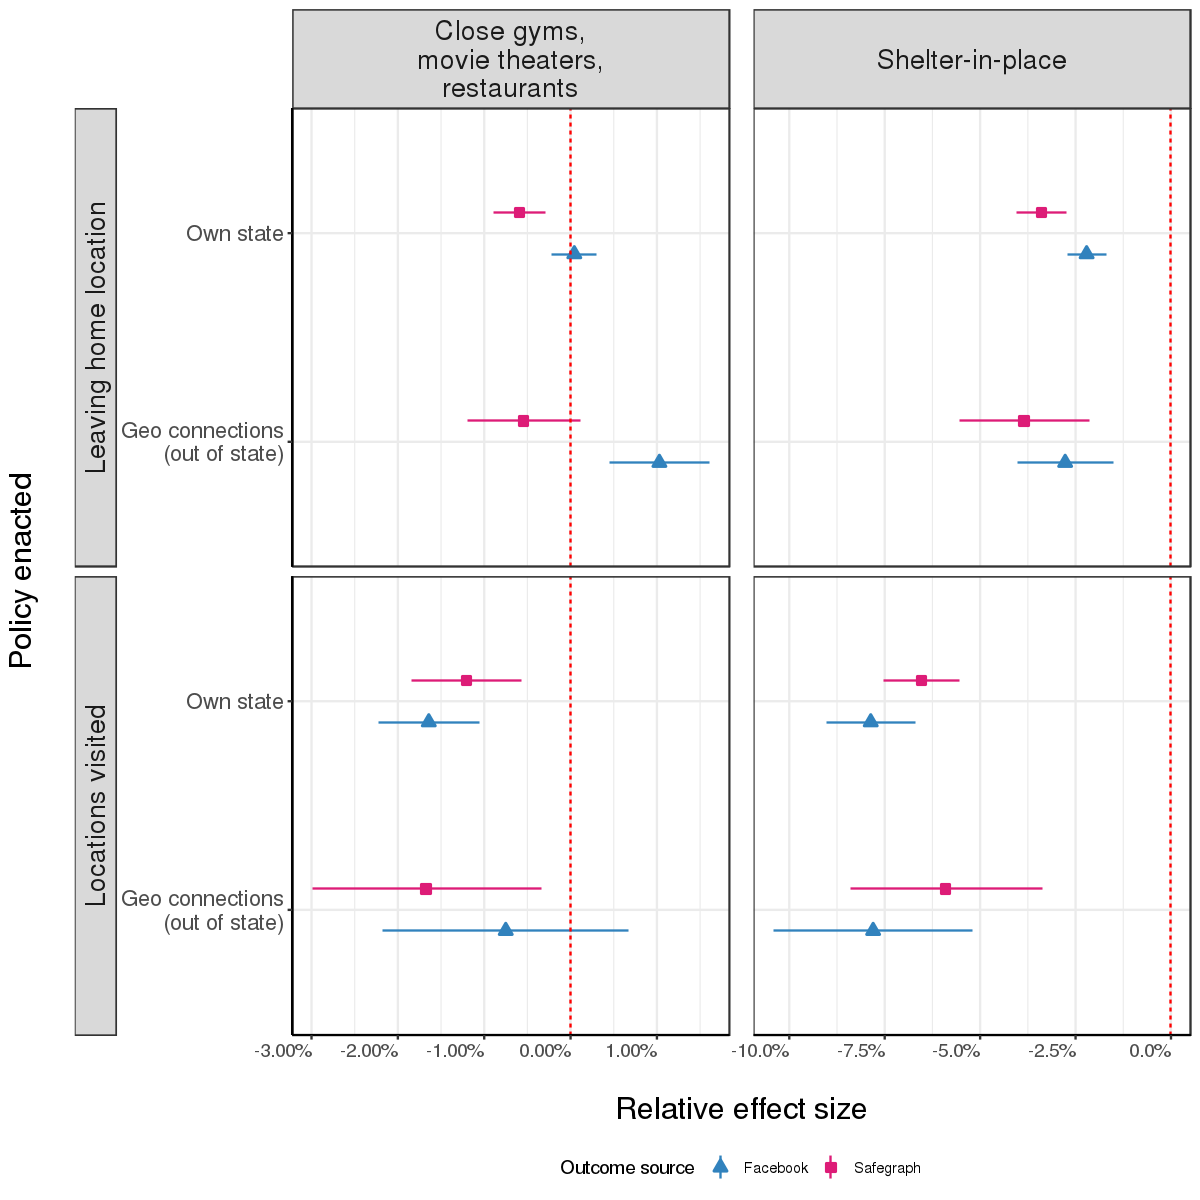

In [23]:
plot_df_spillovers_diff <- plot_df_spillovers_diff %>%
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )

diff_in_diff_mp_plot_itt_geo_diff <- plot_df_spillovers_diff %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill=outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = 'Outcome source', values = outcome_source_colors) +
  facet_grid(outcome_type~policy, scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n')
diff_in_diff_mp_plot_itt_geo_diff

In [24]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_geo_state_bundle.pdf"),
  plot = diff_in_diff_mp_plot_itt_geo_diff,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7.5,
  height = 10,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

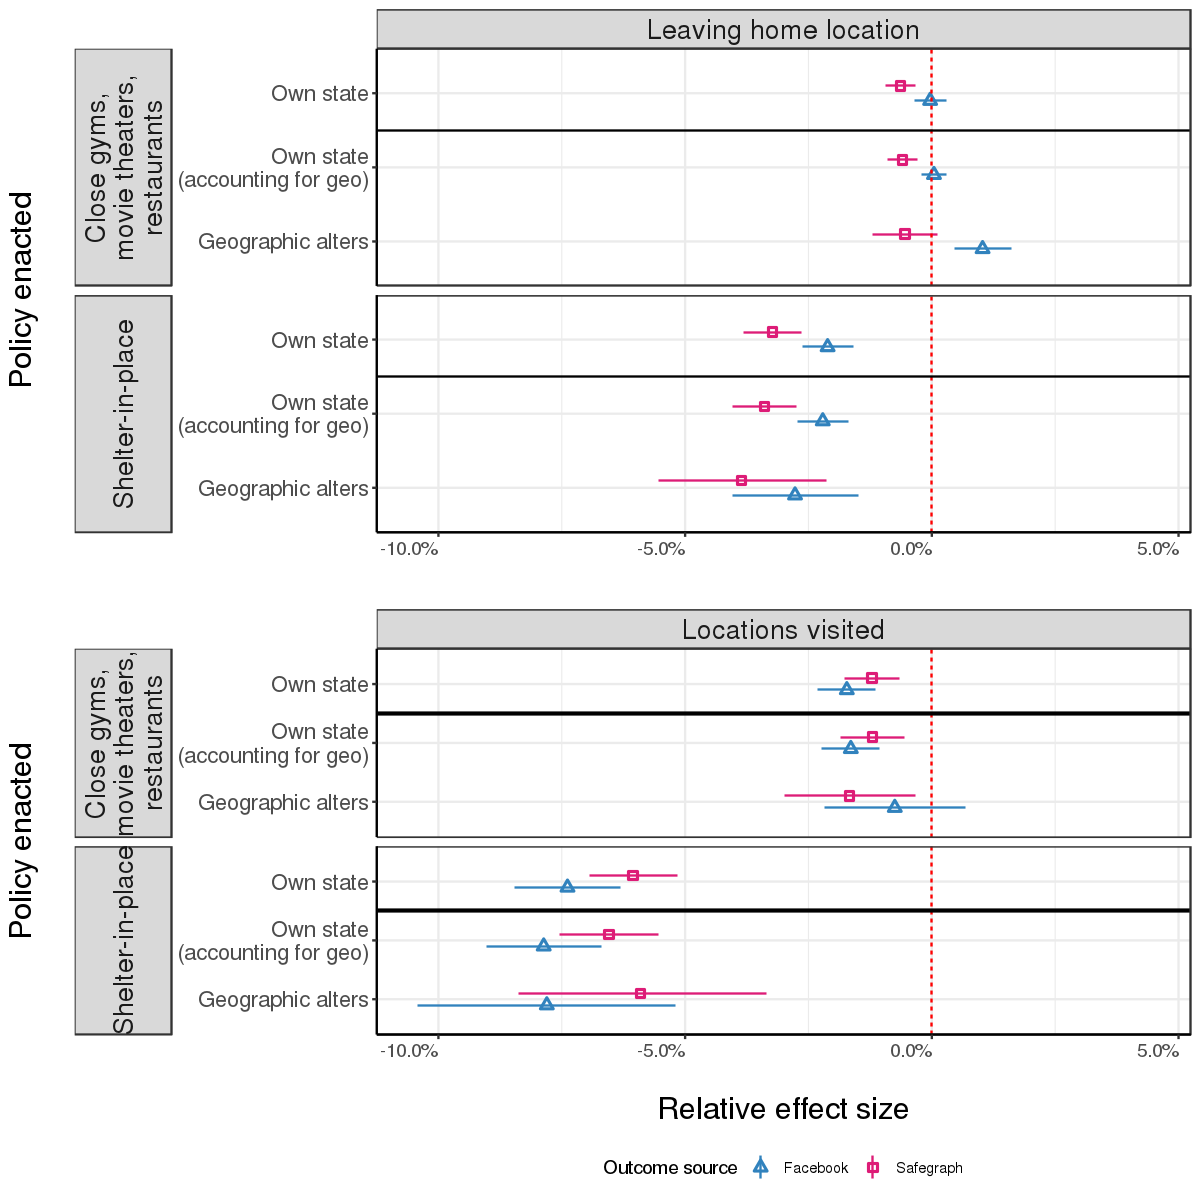

In [25]:
# Generate plot for main text 
#limits <- c(-.105, .045)

lv_state <- rbind(plot_df %>% mutate(subject = 'Own state',
                         model = 'Ego Policies Only') %>%
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model),
      plot_df_spillovers_diff %>% mutate(subject = ifelse(subject == 'Own state', 
                                                         'Own state\n(accounting for geo)', 'Geographic alters'),
          model = 'Ego and Geographic Alter Policies') %>% 
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model)) %>% 
      filter(outcome_type == 'Locations visited') %>%
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Ban gatherings',
                                                       'Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  mutate(subject = factor(subject, ordered=TRUE, levels=c('Geographic alters',
                                                          'Own state\n(accounting for geo)',
                                                          'Own state'
                                                        ))) %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  facet_grid(policy~outcome_type, switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent, lim=limits) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n') + 
  geom_hline(yintercept = 2.5, col='black', size=.9)

lhl_state <- rbind(plot_df %>% mutate(subject = 'Own state',
                         model = 'Ego Policies Only') %>%
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model),
      plot_df_spillovers_diff %>% mutate(subject = ifelse(subject == 'Own state', 
                                                         'Own state\n(accounting for geo)', 'Geographic alters'),
          model = 'Ego and Geographic Alter Policies') %>% 
      dplyr::select(outcome, coef, log, var, policy, subject, outcome_type, outcome_source, model)) %>% 
      filter(outcome_type == 'Leaving home location') %>%
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Ban gatherings',
                                                       'Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  mutate(subject = factor(subject, ordered=TRUE, levels=c('Geographic alters',
                                                          'Own state\n(accounting for geo)',
                                                          'Own state'
                                                        ))) %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  facet_grid(policy~outcome_type, switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="none",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent, lim=limits) +
  ylab('Policy enacted\n') + 
  xlab('') +
  geom_hline(yintercept = 2.5, col='black', size=.5)

main_figure <- plot_grid(lhl_state, lv_state, ncol=1)
main_figure

In [26]:
coef(did_sgnhd_both_split)

stay_home.r      geo_alter_sh_same_state.r 
                  -0.017707015                   -0.002041967 
     geo_alter_sh_diff_state.r          alter_sh_same_state.r 
                   0.006146537                   -0.014390105 
         alter_sh_diff_state.r                      ban_gmr.r 
                  -0.101358229                   -0.001681562 
geo_alter_ban_gmr_same_state.r geo_alter_ban_gmr_diff_state.r 
                   0.006711917                   -0.017020410 
    alter_ban_gmr_same_state.r     alter_ban_gmr_diff_state.r 
                  -0.011914863                    0.011935354

In [27]:
# Generate a table for both split model
mult = 100
star <- stargazer(did_fbrnstu_both_split, did_sgnhd_both_split, did_sgcbgv_both_split, did_btvrc_both_split,
          covariate.labels = c('Ego shelter-in-place',
                               'In-state geo-alter shelter-in-place',
                               'Out-of-state geo-alter shelter-in-place',
                               'In-state social-alter shelter-in-place',
                               'Out-of-state social-alter shelter-in-place',
                               'Ego close gym/movies/restaurants',
                               'In-state geo-alter close gyms/movies/restaurants',                               
                               'Out-of-state geo-alter close gyms/movies/restaurants',
                               'In-state social-alter close gyms/movies/restaurants',                               
                               'Out-of-state social-alter close gyms/movies/restaurants'),
          dep.var.labels = c('asinh(NSBTUs)', 'asinh(NHDF)',
                             'log(dCBGVs)', 'BTVRC'),
          coef = list(mult*coef(did_fbrnstu_both_split), mult*coef(did_sgnhd_both_split), 
                      mult*coef(did_sgcbgv_both_split), mult*coef(did_btvrc_both_split)),
          se = list(mult*sqrt(diag(out_fbrnstu_both_split$vcov.both)),
                    mult*sqrt(diag(out_sgnhd_both_split$vcov.both)),
                    mult*sqrt(diag(out_sgcbgv_both_split$vcov.both)),
                    mult*sqrt(diag(out_btvrc_both_split$vcov.both))),
          add.lines = list(
              c('Conley s.e.', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('County fixed effect', 'Yes', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes', 'Yes')),
          label='tab:diff_in_diff_geo_split_state',
          title='The effect of policy interventions on county-level outcomes, including in-state and out-of-state geo- and social-spillovers.',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{5}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} SBTU refers to the fraction of Facebook users in a given county who visit only one Bing tile on a given day. HDF refers to the fraction of devices completely at home, as measured by Safegraph. dCBGVs refers to the mean number of census block groups devices from a given county visit, as measured by Safegraph. BTVRC refers to the relative change in the number of Bing tiles users visit, as measured by Facebook. All values multiplied by 100. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/diff_in_diff_both_split_state.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 14, 2020 - 06:12:13 PM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on county-level outcomes, including in-state and out-of-state geo- and social-spillovers.} 
  \label{tab:diff_in_diff_geo_split_state} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & asinh(NSBTUs) & asinh(NHDF) & log(dCBGVs) & BTVRC \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 Ego shelter-in-place & $-$0.32 & $-$1.77$^{***}$ & $-$2.70$^{**}$ & $-$1.62 \\ 
  & (0.45) & (0.66) & (1.23) & (1.37) \\ 
  & & & & \\ 
 In-state geo-alter shelter-in-place & 1.38$^{**}$ & $-$0.20 & $-$2.76$^{**}$ & 1.74 \\ 
  & (0.62) & (0.78) & (1.23) & (1.31) \\ 
  & & & & \\ 
 Out-of-state geo-alter shelter-in-place & 3.43$^{***}$ 

In [28]:
sh_index <- which(names(coefficients(did_sgnhd_geo_split)) == 'stay_home.r')
gmr_index <- which(names(coefficients(did_sgnhd_geo_split)) == 'ban_gmr.r')
sh_geo_index_same <- which(names(coefficients(did_btvrc_both_split)) == 'geo_alter_sh_same_state.r')
sh_geo_index_diff<- which(names(coefficients(did_btvrc_both_split)) == 'geo_alter_sh_diff_state.r')
gmr_geo_index_same <- which(names(coefficients(did_btvrc_both_split)) == 'geo_alter_ban_gmr_same_state.r')
gmr_geo_index_diff <- which(names(coefficients(did_btvrc_both_split)) == 'geo_alter_ban_gmr_diff_state.r')
sh_alter_index_same <- which(names(coefficients(did_btvrc_both_split)) == 'alter_sh_same_state.r')
sh_alter_index_diff<- which(names(coefficients(did_btvrc_both_split)) == 'alter_sh_diff_state.r')
gmr_alter_index_same <- which(names(coefficients(did_btvrc_both_split)) == 'alter_ban_gmr_same_state.r')
gmr_alter_index_diff <- which(names(coefficients(did_btvrc_both_split)) == 'alter_ban_gmr_diff_state.r')

model_coefs.combine_own_state_both <- function(model_object, shi_o, gmri_o, shi_i, gmri_i, shi_is, gmr_is) {
    c(
        coef(model_object)[shi_o] + coef(model_object)[shi_i] + coef(model_object)[shi_is],
        coef(model_object)[gmri_o] + coef(model_object)[gmri_i] + coef(model_object)[gmr_is]
    )
}

var_coefs.combine_own_state_both <- function(output_object, shi_o, gmri_o, shi_i, gmri_i, shi_is, gmr_is) {
    c(
        output_object$vcov.both[shi_o, shi_o] + output_object$vcov.both[shi_i, shi_i] + 
        output_object$vcov.both[shi_is, shi_is] + 2*output_object$vcov.both[shi_i, shi_o] + 
        2*output_object$vcov.both[shi_i, shi_is] + 2*output_object$vcov.both[shi_o, shi_is],
        output_object$vcov.both[gmri_o, gmri_o] + output_object$vcov.both[gmri_i, gmri_i] + 
        output_object$vcov.both[gmr_is, gmr_is] + 2*output_object$vcov.both[gmri_o, gmri_i] + 
        2*output_object$vcov.both[gmri_i, gmr_is] + 2*output_object$vcov.both[gmri_o, gmr_is]
    )
      
}

plot_df_spillovers_diff_both_combine <- data.frame(outcome = rep(c(rep('Non-Single Bing\ntile users\n(FB)', 2),
                                  rep('Non-Home device\nfraction\n(Safegraph)', 2),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 2),
                                  rep('Bing tiles\nvisited per\n device (FB)', 2)), 3),
                      coef = c(model_coefs.combine_own_state_both(did_fbrnstu_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state_both(did_sgnhd_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state_both(did_sgcbgv_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state_both(did_btvrc_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs(did_fbrnstu_both_split, sh_geo_index_diff, gmr_geo_index_diff),                               
                               model_coefs(did_sgnhd_both_split, sh_geo_index_diff, gmr_geo_index_diff),                               
                               model_coefs(did_sgcbgv_both_split, sh_geo_index_diff, gmr_geo_index_diff),                                                              
                               model_coefs(did_btvrc_both_split, sh_geo_index_diff, gmr_geo_index_diff),
                               model_coefs(did_fbrnstu_both_split, sh_alter_index_diff, gmr_alter_index_diff),                               
                               model_coefs(did_sgnhd_both_split, sh_alter_index_diff, gmr_alter_index_diff),                               
                               model_coefs(did_sgcbgv_both_split, sh_alter_index_diff, gmr_alter_index_diff),                                                              
                               model_coefs(did_btvrc_both_split, sh_alter_index_diff, gmr_alter_index_diff)                               
                              ), 
                      log = rep(c(rep(1, 6), rep(0, 2)), 3),
                      var = c(var_coefs.combine_own_state_both(out_fbrnstu_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state_both(out_sgnhd_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state_both(out_sgcbgv_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state_both(out_btvrc_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs(out_fbrnstu_both_split, sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_sgnhd_both_split, sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_sgcbgv_both_split, sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_btvrc_both_split, sh_geo_index_diff, gmr_geo_index_diff),
                              var_coefs(out_fbrnstu_both_split, sh_alter_index_diff, gmr_alter_index_diff),
                              var_coefs(out_sgnhd_both_split, sh_alter_index_diff, gmr_alter_index_diff),
                              var_coefs(out_sgcbgv_both_split, sh_alter_index_diff, gmr_alter_index_diff),
                              var_coefs(out_btvrc_both_split, sh_alter_index_diff, gmr_alter_index_diff)
                             ),
                      policy = rep(c('Shelter-in-place', 
                                   'Close gyms,\nmovie theaters,\nrestaurants'), 12),
                     subject = c(rep('Own state', 8), 
                                 rep('Geo connections\n(out of state)', 8),
                                 rep('Social connections\n(out of state)', 8)
                                ))

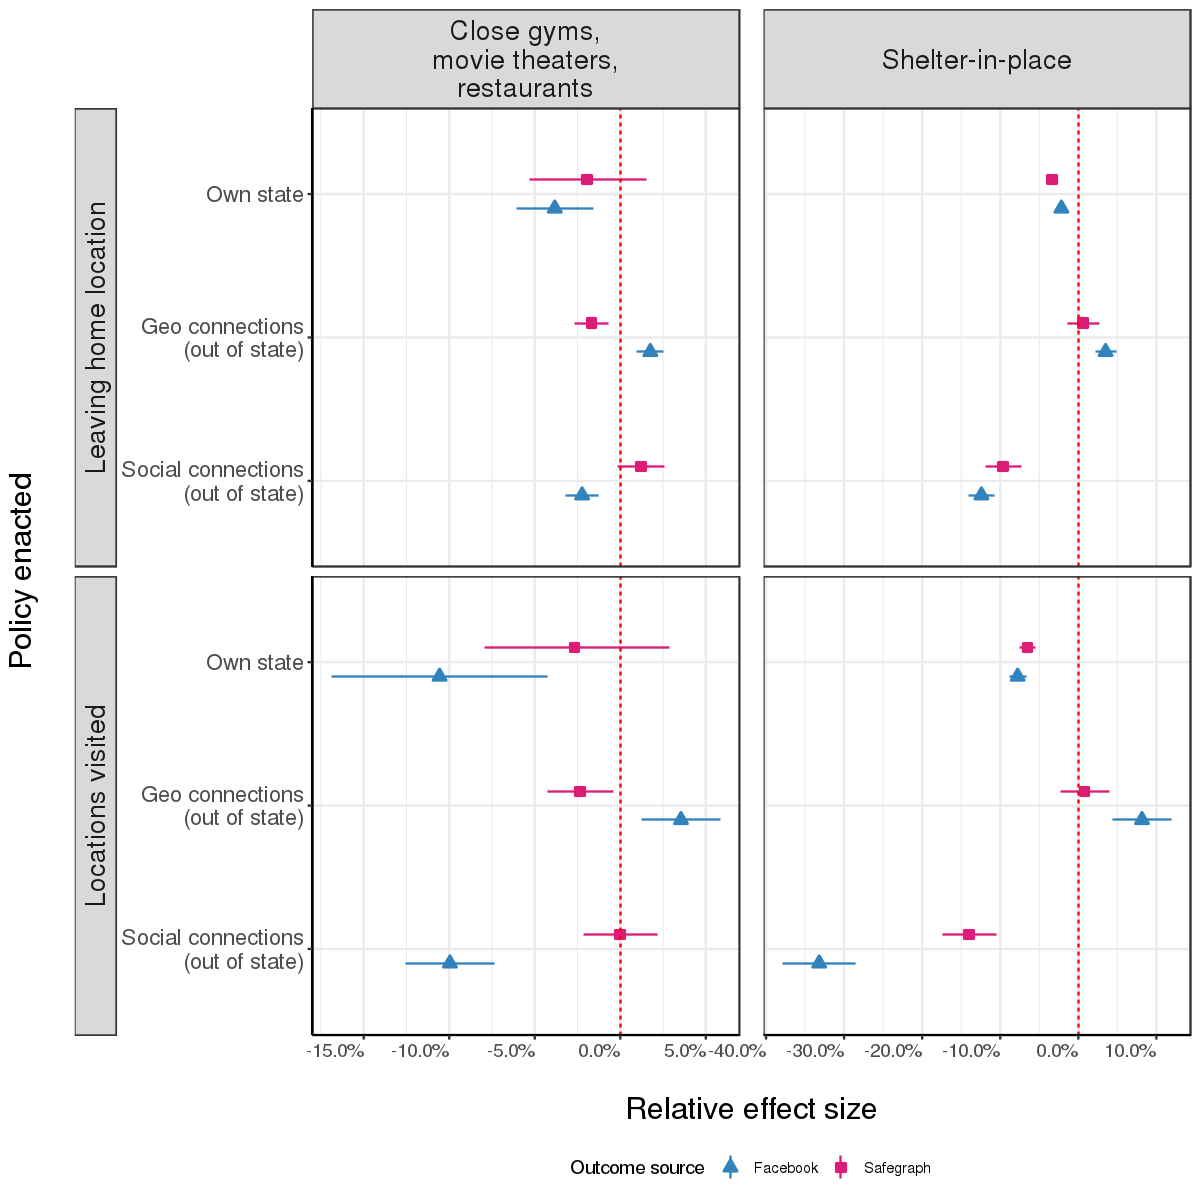

In [29]:
plot_df_spillovers_diff_both_combine <- plot_df_spillovers_diff_both_combine %>%
   
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )

diff_in_diff_mp_plot_itt_geo_diff_both <- plot_df_spillovers_diff_both_combine %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
mutate(subject = factor(subject, ordered=TRUE,
                       levels = c(levels(subject)[3], levels(subject)[1],
                                 levels(subject)[2]))) %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill = outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = "Outcome source", values = outcome_source_colors) +
  facet_grid(outcome_type~policy, scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n')
diff_in_diff_mp_plot_itt_geo_diff_both

In [30]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_both_state_bundle.pdf"),
  plot = diff_in_diff_mp_plot_itt_geo_diff_both,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7.5,
  height = 10,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [31]:
plot_df_spillovers_diff_both_total_combine <- data.frame(outcome = rep(c(rep('Non-Single Bing\ntile users\n(FB)', 2),
                                  rep('Non-Home device\nfraction\n(Safegraph)', 2),
                                  rep('Census block\ngroup visits\nper device\n(Safegraph)', 2),
                                  rep('Bing tiles\nvisited per\n device (FB)', 2)), 2),
                      coef = c(model_coefs.combine_own_state_both(did_fbrnstu_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state_both(did_sgnhd_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state_both(did_sgcbgv_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state_both(did_btvrc_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                               model_coefs.combine_own_state(did_fbrnstu_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff),                               
                               model_coefs.combine_own_state(did_sgnhd_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff),                               
                               model_coefs.combine_own_state(did_sgcbgv_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff),                                                              
                               model_coefs.combine_own_state(did_btvrc_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff)                              
                              ), 
                      log = rep(c(rep(1, 6), rep(0, 2)), 2),
                      var = c(var_coefs.combine_own_state_both(out_fbrnstu_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state_both(out_sgnhd_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state_both(out_sgcbgv_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state_both(out_btvrc_both_split, sh_index, gmr_index,
                                                            sh_geo_index_same, gmr_geo_index_same,
                                                            sh_alter_index_same, gmr_alter_index_same),
                              var_coefs.combine_own_state(out_fbrnstu_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff),
                              var_coefs.combine_own_state(out_sgnhd_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff),
                              var_coefs.combine_own_state(out_sgcbgv_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff),
                              var_coefs.combine_own_state(out_btvrc_both_split, sh_geo_index_diff, 
                                                             gmr_geo_index_diff, sh_alter_index_diff,
                                                            gmr_alter_index_diff)
                             ),
                      policy = rep(c('Shelter-in-place', 
                                   'Close gyms,\nmovie theaters,\nrestaurants'), 8),
                     subject = c(rep('Own state', 8), 
                                 rep('Other states', 8)
                                ))

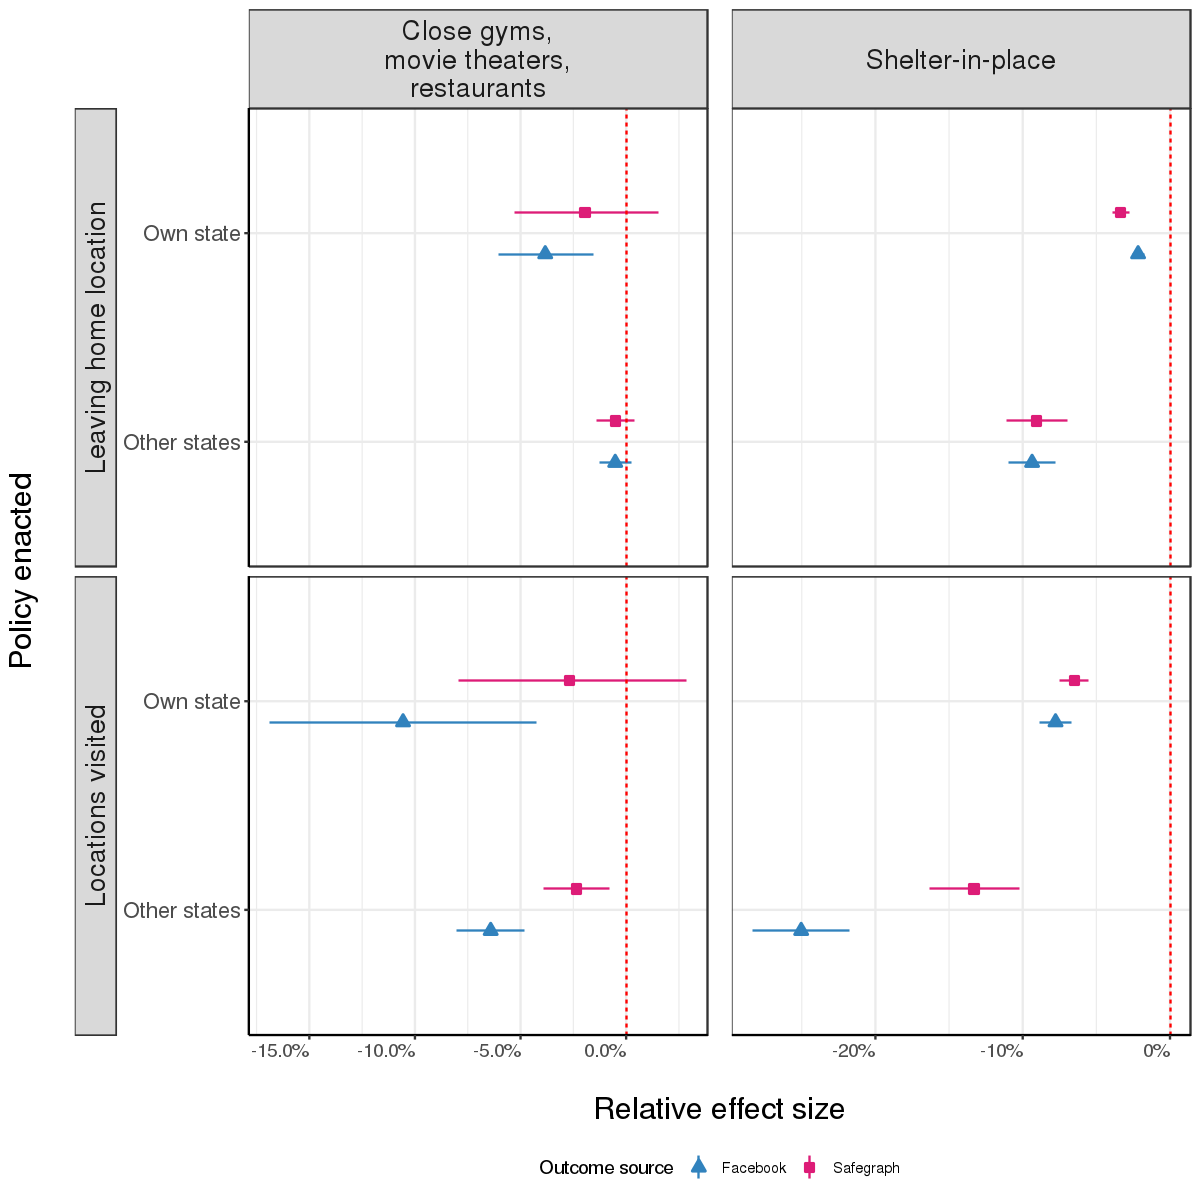

In [32]:
plot_df_spillovers_diff_both_combine <- plot_df_spillovers_diff_both_total_combine %>%
   
    mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )

diff_in_diff_mp_plot_itt_geo_diff_both <- plot_df_spillovers_diff_both_combine %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
mutate(subject = factor(subject, ordered=TRUE,
                       levels = c(levels(subject)[3], levels(subject)[1],
                                 levels(subject)[2]))) %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill=outcome_source
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(name = "Outcome source", values = outcome_source_colors) + 
  facet_grid(outcome_type~policy, scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n')
diff_in_diff_mp_plot_itt_geo_diff_both

In [33]:
# Write plot to output
ggsave(
  paste0("../output/diff_in_diff_both_state_aggregate.pdf"),
  plot = diff_in_diff_mp_plot_itt_geo_diff_both,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7.5,
  height = 10,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

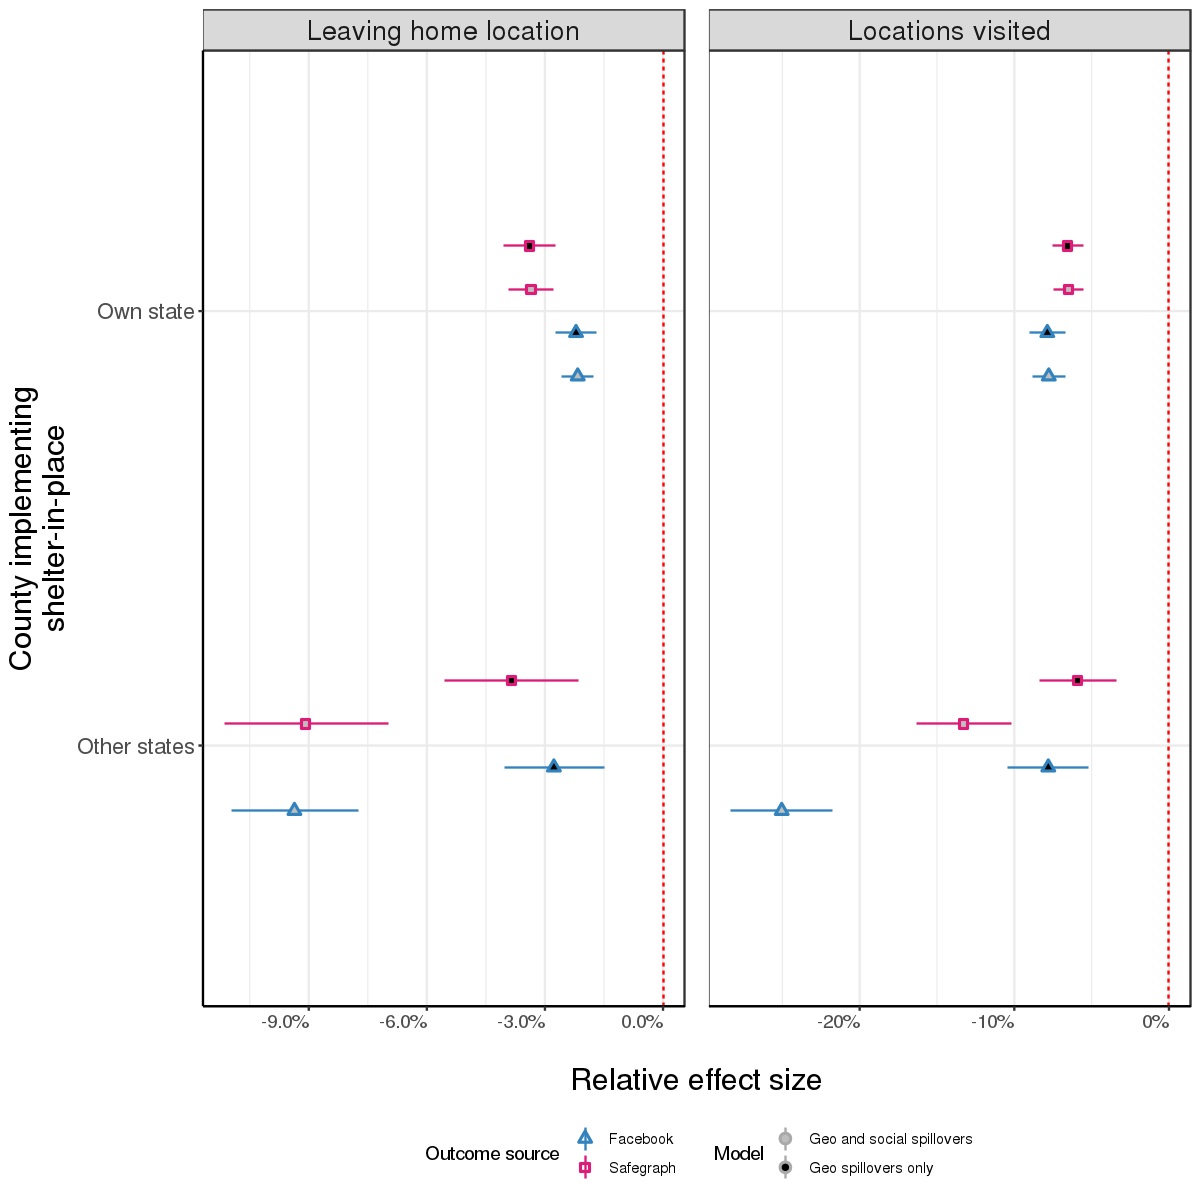

In [34]:
compare_geo_both <- rbind(plot_df_spillovers_diff %>% 
      mutate(subject = ifelse(subject == 'Own state', 'Own state', 'Other states'),
      model = 'Geo spillovers only'),
      plot_df_spillovers_diff_both_total_combine %>% mutate(model = 'Geo and social spillovers') %>% 
         mutate(
        outcome_type = outcome_types[outcome],
        outcome_source = get_outcome_source(as.character(outcome))
    )) %>% 
  mutate(lb = coef - 1.96*sqrt(var),
         ub = coef + 1.96*sqrt(var)) %>% 
  mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
         lb = ifelse(log == 1, exp(lb) - 1, lb),
        ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
  mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                        'Shelter-in-place'))) %>% 
  filter(policy == 'Shelter-in-place') %>%
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill=model
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(values = c("grey", "black")) +
  facet_grid(~str_wrap(outcome_type, 26), scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab(str_wrap('County implementing shelter-in-place', 26)) + 
theme(
    #legend.position = c(0.3, -.4),
    #plot.margin = margin(t = 2, l = 2, r = 2, b = 80, unit = "pt")
    legend.position = "bottom",
    legend.box = "horizontal"
) +
guides(
    color = guide_legend(nrow = 2),
    fill = guide_legend(
        nrow = 2,
        override.aes=list(shape = 21, color = "#aaaaaa"),
        title='Model'
    )
)
compare_geo_both  

In [35]:
ggsave(
  paste0("../output/compare_geo_both.pdf"),
  plot = compare_geo_both,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7,
  height = 5,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

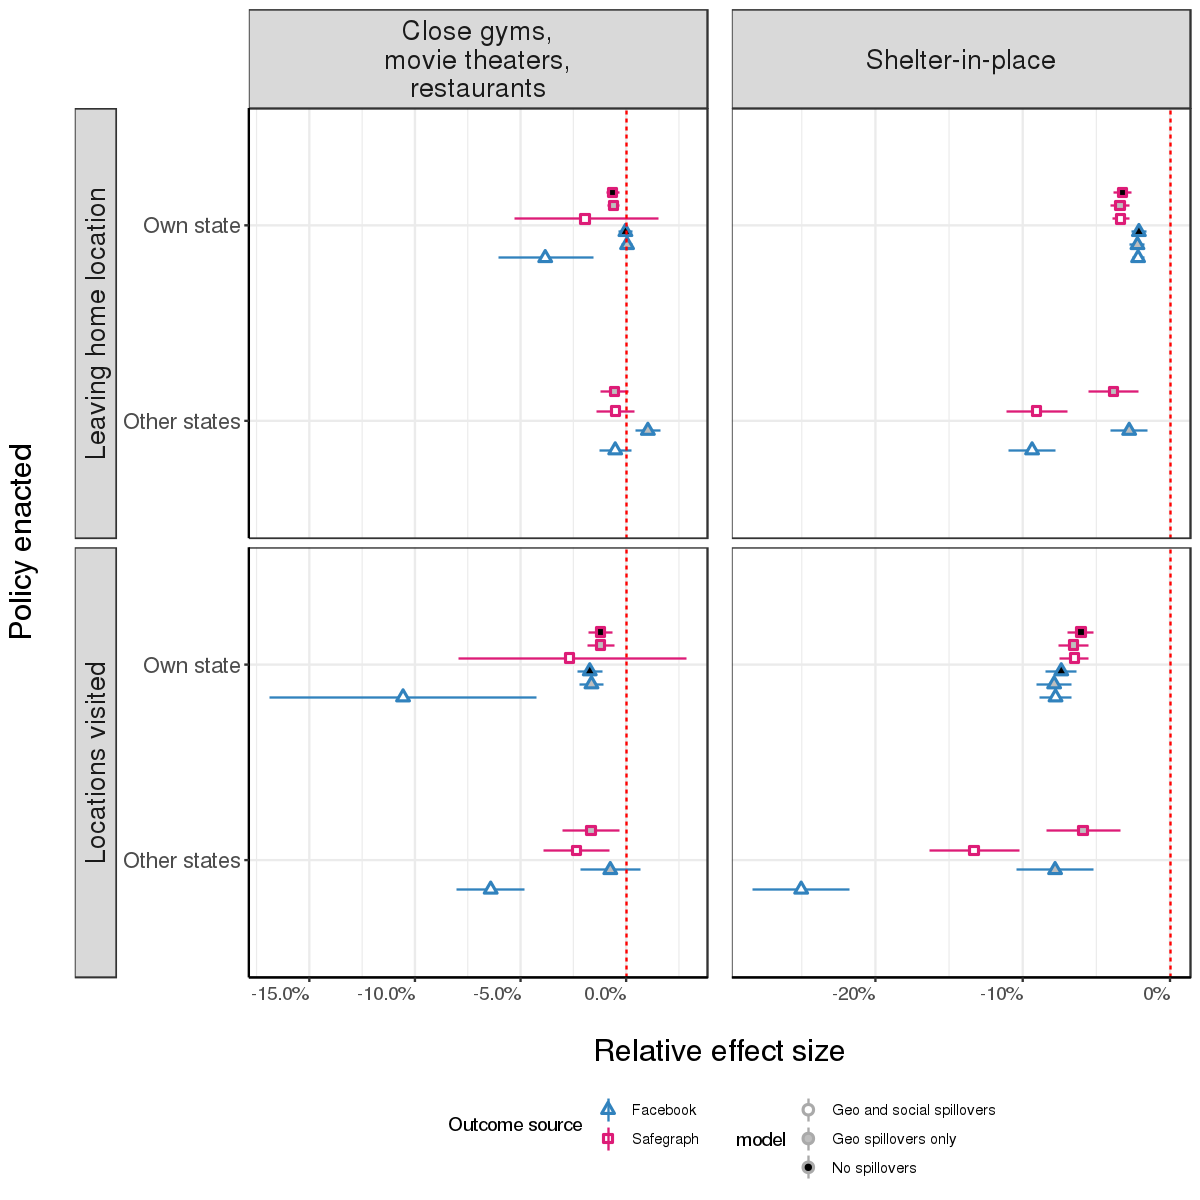

In [36]:
compare_all <- rbind(plot_df %>% mutate(subject = 'Own state',
                         model = 'No spillovers') %>% 
      dplyr::select(-outcome_source, -outcome_type),
      plot_df_spillovers_diff %>% 
      mutate(subject = ifelse(subject == 'Own state', 'Own state', 'Other states'),
             model = "Geo spillovers only") %>% 
      dplyr::select(-outcome_source, -outcome_type),
      plot_df_spillovers_diff_both_total_combine %>% 
      mutate(model = 'Geo and social spillovers')) %>%
      mutate(lb = coef - 1.96*sqrt(var),
             ub = coef + 1.96*sqrt(var)) %>% 
      mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
             lb = ifelse(log == 1, exp(lb) - 1, lb),
             ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
     mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                           'Shelter-in-place'))) %>% 
     mutate(
         outcome_type = outcome_types[outcome],
         outcome_source = get_outcome_source(as.character(outcome))
           ) %>% 
  ggplot(., aes(x=coef, y=subject, xmin=lb, xmax=ub,
                color=outcome_source, shape=outcome_source,
                fill=model
  )) +
  geom_pointrange(position = position_dodge(width = .4)) + 
  scale_color_manual(name = "Outcome source", values = outcome_source_colors) +
  scale_shape_manual(name = "Outcome source", values = outcome_source_shapes) +
  scale_fill_manual(values = c("white", "grey", "black")) +
  facet_grid(outcome_type~policy, scales='free_x', switch='y') +
  theme(axis.text.x = element_text(hjust = 1, size=11),
                axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.spacing.x=unit(1, "lines"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom",
       strip.placement.y='outside') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) +
  xlab('\nRelative effect size') +
  ylab('Policy enacted\n') + 
theme(
    #legend.position = c(0.3, -.4),
    #plot.margin = margin(t = 2, l = 2, r = 2, b = 80, unit = "pt")
    legend.position = "bottom",
    legend.box = "horizontal"
) +
guides(
    color = guide_legend(nrow = 2),
    fill = guide_legend(
        nrow = 3,
        override.aes=list(shape = 21, color = "#aaaaaa")
    )
)
compare_all

In [ ]:
state_combine_total_results_df <- plot_df_spillovers_diff_both_total_combine %>% 
  mutate(lb = coef - 1.96*sqrt(var),
             ub = coef + 1.96*sqrt(var)) %>% 
      mutate(coef = round(100*ifelse(log == 1, exp(coef) - 1, coef), 2),
             lb = round(100*ifelse(log == 1, exp(lb) - 1, lb), 2),
             ub = round(100*ifelse(log == 1, exp(ub) - 1, ub), 2))

state_combine_total_results_df

In [ ]:
geo_and_social_state_spillover_cbgv <- abs((state_combine_total_results_df %>% 
  filter(str_detect(as.character(policy), 'Shelter') & 
         str_detect(as.character(outcome), 'block') & 
         str_detect(as.character(subject), 'Other')))$coef)

geo_and_social_state_spillover_nhd <- abs((state_combine_total_results_df %>% 
  filter(str_detect(as.character(policy), 'Shelter') & 
         str_detect(as.character(outcome), 'fraction') & 
         str_detect(as.character(subject), 'Other')))$coef)

addParam("\\ddsocialgeostatespillovernhd", formatParamString(geo_and_social_state_spillover_nhd))
addParam("\\ddsocialgeostatespillovercbgv", formatParamString(geo_and_social_state_spillover_cbgv))

In [37]:
ggsave(
  paste0("../output/compare_all.pdf"),
  plot = compare_all,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 7,
  height = 5,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [38]:
model_save_location = '/nfs/sloanlab004/projects/covid_mobility_proj/models/'

# Load focal only models
# The first four rows here are backwards, but this is also backwards in the save file. 
#Should fix both (and remove both comments!)
ll_DiD.sp_fbrstu <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_focal.rds'))
ll_out_fbrstu <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_focal_vcov.rds'))
ll_DiD.sp_hd <- readRDS(file=str_c(model_save_location, 'll_did_fbnrstu_focal.rds'))
ll_out_sp_hd <- readRDS(file=str_c(model_save_location, 'll_did_fbrnstu_focal_vcov.rds'))
ll_DiD.sp_cbgv <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_focal.rds'))
ll_out_sp_cbgv <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_focal_vcov.rds'))
ll_DiD.sp_btvrc <- readRDS(file=str_c(model_save_location, 'll_did_fbbtvrc_focal.rds'))
ll_out_sp_btvrc <- readRDS(file=str_c(model_save_location, 'll_did_fbbtvrc_focal_vcov.rds'))

# Load focal + geo models
ll_DID.mp_go.aITT.sg_hd <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_geo.rds'))
ll_out_hd_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_geo_vcov.rds'))
ll_DID.mp_go.aITT.sg_rstu <- readRDS(file=str_c(model_save_location, 'll_did_fbnrstu_geo.rds'))
ll_out_rstu_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'll_did_fbrnstu_geo_vcov.rds'))
ll_DID.mp_go.aITT.sg_cbgv <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_geo.rds'))
ll_out_cbgv_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_geo_vcov.rds'))
ll_DID.mp_go.aITT.sg_btvrc <- readRDS(file=str_c(model_save_location, 'll_did_fbbtvrc_geo.rds'))
ll_out_btvrc_aitt_sg_go <- readRDS(file=str_c(model_save_location, 'll_did_fbbtvrc_geo_vcov.rds'))

# Load focal + geo + social models
ll_DID.mp.aITT.sg_hd <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_both.rds'))
ll_out_hd_aitt_sg <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_both_vcov.rds'))
ll_DID.mp.aITT.sg_rstu <- readRDS(file=str_c(model_save_location, 'll_did_fbnrstu_both.rds'))
ll_out_rstu_aitt_sg <- readRDS(file=str_c(model_save_location, 'll_did_fbrnstu_both_vcov.rds'))
ll_DID.mp.aITT.sg_cbgv <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_both.rds'))
ll_out_cbgv_aitt_sg <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_both_vcov.rds'))
ll_DID.mp.aITT.sg_btvrc <- readRDS(file=str_c(model_save_location, 'll_did_fbbtvrc_both.rds'))
ll_out_btvrc_aitt_sg <- readRDS(file=str_c(model_save_location, 'll_did_fbbtvrc_both_vcov.rds'))

# Load focal + geo split models
ll_did_sgnhd_geo_split <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_geo_split.rds'))
ll_out_sgnhd_geo_split <- readRDS(file=str_c(model_save_location, 'll_out_sgnhd_geo_split.rds'))
ll_did_fbrnstu_geo_split <- readRDS(file=str_c(model_save_location, 'll_did_fbrnstu_geo_split.rds'))
ll_out_fbrnstu_geo_split <- readRDS(file=str_c(model_save_location, 'll_out_fbrnstu_geo_split.rds'))
ll_did_sgcbgv_geo_split <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_geo_split.rds'))
ll_out_sgcbgv_geo_split <- readRDS(file=str_c(model_save_location, 'll_out_sgcbgv_geo_split.rds'))
ll_did_btvrc_geo_split <- readRDS(file=str_c(model_save_location, 'll_did_btvrc_geo_split.rds'))
ll_out_btvrc_geo_split <- readRDS(file=str_c(model_save_location, 'll_out_btvrc_geo_split.rds'))

# Load focal + geo + social split models
ll_did_sgnhd_both_split <- readRDS(file=str_c(model_save_location, 'll_did_sgnhd_both_split.rds'))
ll_out_sgnhd_both_split <- readRDS(file=str_c(model_save_location, 'll_out_sgnhd_both_split.rds'))
ll_did_fbrnstu_both_split <- readRDS(file=str_c(model_save_location, 'll_did_fbrnstu_both_split.rds'))
ll_out_fbrnstu_both_split <- readRDS(file=str_c(model_save_location, 'll_out_fbrnstu_both_split.rds'))
ll_did_sgcbgv_both_split <- readRDS(file=str_c(model_save_location, 'll_did_sgcbgv_both_split.rds'))
ll_out_sgcbgv_both_split <- readRDS(file=str_c(model_save_location, 'll_out_sgcbgv_both_split.rds'))
ll_did_btvrc_both_split <- readRDS(file=str_c(model_save_location, 'll_did_btvrc_both_split.rds'))
ll_out_btvrc_both_split <- readRDS(file=str_c(model_save_location, 'll_out_btvrc_both_split.rds'))

In [39]:
models = list(ll_DiD.sp_fbrstu, ll_DiD.sp_hd, ll_DiD.sp_cbgv, ll_DiD.sp_btvrc)
vcovs = list(ll_out_fbrstu$vcov.both, ll_out_sp_hd$vcov.both, ll_out_sp_cbgv$vcov.both, ll_out_sp_btvrc$vcov.both)
outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

stay_home_index = 4
bgmr_index = 11
lead_lag_length = 3
n_outcomes = 2

get_lead_and_lags <- function(vector, index, lead_lag_length) {
    return_vector = vector[(index-lead_lag_length):(index+lead_lag_length)]
    return_vector
}

lead_lag_variable_name <- function(policy, k){
    if(k < 0){
        var_name <- paste(policy, "_p", abs(k), ".r", sep="")
    }
    else if (k == 0){
        var_name <- paste(policy, ".r", sep="")
    }
    else{
        var_name <- paste(policy, "_m", abs(k), ".r", sep="")
    }
    var_name
}

model_coefs.total_effect <- function(coefs, policies, lead_lag_length) {
    tes = rep(0, 2 * lead_lag_length + 1)
    policies <- c(policies)
    for(policy in policies){
        policy <- gsub("[.]r", "", policy)
        for(t in (-lead_lag_length:lead_lag_length)){
            ixs <- (t+lead_lag_length + 1):length(tes)
            var_name <- lead_lag_variable_name(policy, t)
           if(!(var_name %in% names(coefs))){
               var_name <- gsub("[.]r", "", var_name)
           }
            me <- coefs[[var_name]]
            tes[ixs] <- tes[ixs] + me            
        }
    }
    tes
}

var_coefs.total_effect <- function(vcov, policies, lead_lag_length) {
    ses = rep(0, 2 * lead_lag_length + 1)
    policies <- c(policies)
    for(p1 in policies){
         p1 <- gsub("[.]r", "", p1)
        for(t1 in (-lead_lag_length:lead_lag_length)){
            t1_name <- lead_lag_variable_name(p1, t1)
            if(!(t1_name %in% row.names(vcov))){
                t1_name <- gsub("[.]r", "", t1_name)
            }
            
            for(p2 in policies){
                p2 <- gsub("[.]r", "", p2)
                for(t2 in (t1:lead_lag_length)){
                    ixs <- (max(t1, t2)+lead_lag_length + 1):length(ses)
                    t2_name <- lead_lag_variable_name(p2, t2)
                    if(!(t2_name %in% row.names(vcov))){
                        t2_name <- gsub("[.]r", "", t2_name)
                    }
                    cv <- vcov[t1_name, t2_name]
                    if(t2 == t1){
                        ses[ixs] <- ses[ixs] + cv
                    }
                    else{
                        ses[ixs] <- ses[ixs] + 2*cv
                    }
                }
            }
        }
    }
    ses <- sqrt(ses)
    ses
}


ll_df_direct <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])
    se <- sqrt(diag(vcovs[[i]]))
    
    coef_df <- c(get_lead_and_lags(coefs, stay_home_index, lead_lag_length),
                 get_lead_and_lags(coefs, bgmr_index, lead_lag_length))
    te_df <- c(model_coefs.total_effect(coefs, "stay_home", lead_lag_length),
               model_coefs.total_effect(coefs, "ban_gmr", lead_lag_length))
    se_df <- c(get_lead_and_lags(se, stay_home_index, lead_lag_length),
               get_lead_and_lags(se, bgmr_index, lead_lag_length))
    tse_df <- c(var_coefs.total_effect(vcovs[[i]], "stay_home", lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], "ban_gmr", lead_lag_length))
    policy_df <- c(rep('Stay home', 2*lead_lag_length + 1),
                   rep('Ban G/M/R', 2*lead_lag_length + 1))
    outcome_df <- rep(outcomes[i], n_outcomes*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), n_outcomes)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )
   
    plot_df
}

basic_dd_leads_lags <- ll_df_direct %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, ymin=lb, ymax=ub)) + 
  geom_pointrange() + facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0),
       legend.position='bottom') + xlab('Lead / lag') + 
  ylab('Effect size') + labs(color='State')

# plot total effects
basic_dd_leads_lags_total_effects <- ll_df_direct %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, ymin=lb, ymax=ub)) + 
  geom_pointrange() + facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0),
       legend.position='bottom') + xlab('Lead / lag') + 
  ylab('Total Effect size') + labs(color='State')

In [40]:
# Write plot to output
ggsave(
  paste0("../output/basic_dd_leads_lags.pdf"),
  plot = basic_dd_leads_lags,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 7,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

# Write plot to output
ggsave(
  paste0("../output/basic_dd_leads_lags_total_effects.pdf"),
  plot = basic_dd_leads_lags_total_effects,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 7,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

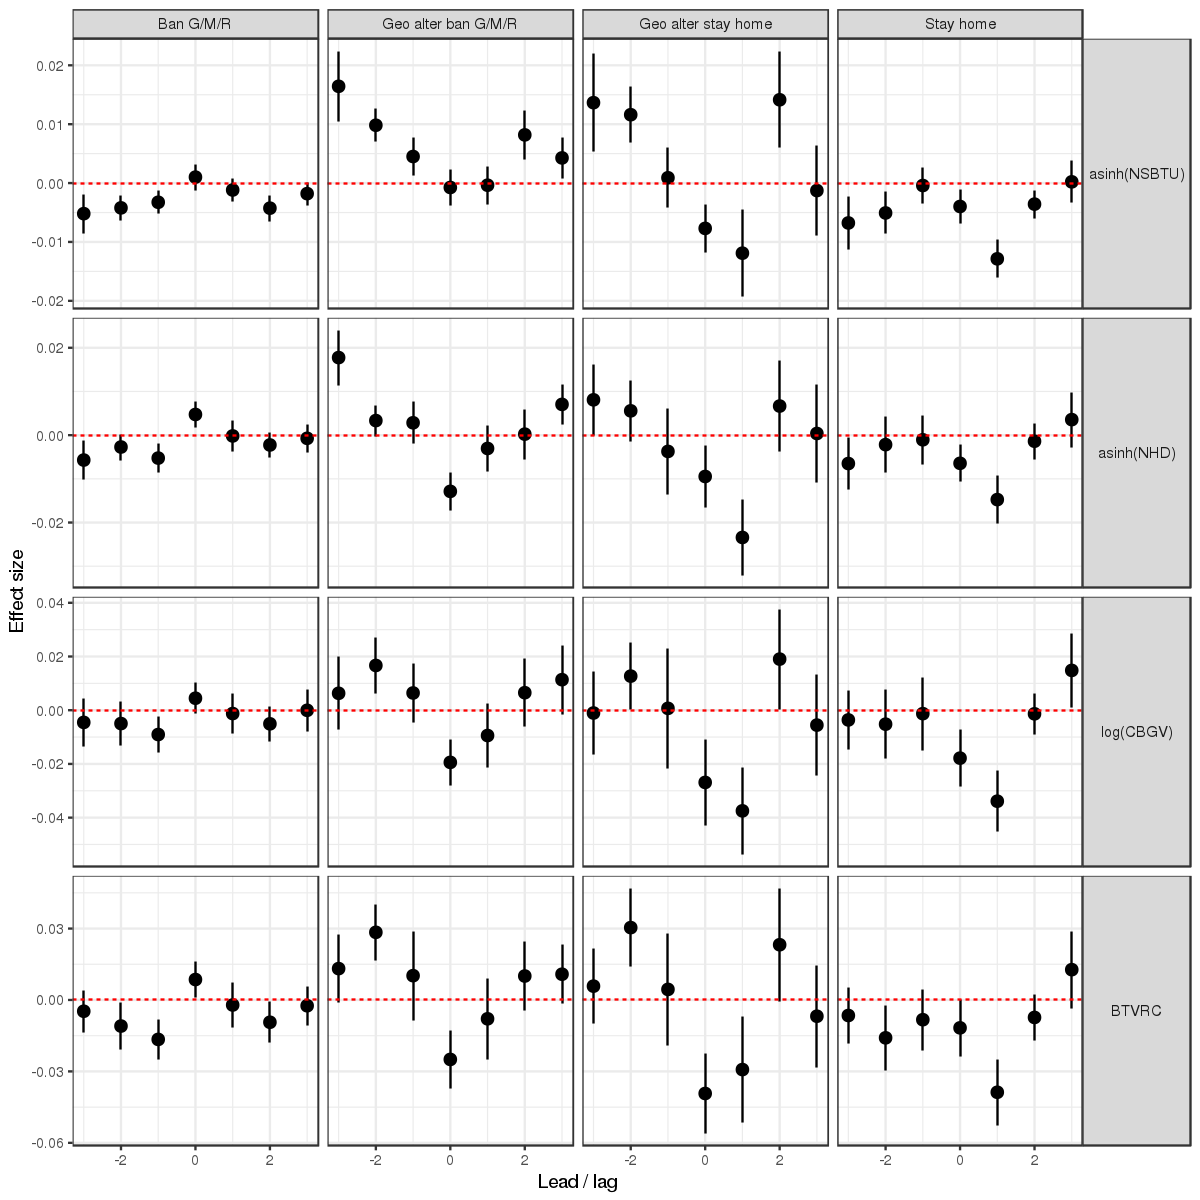

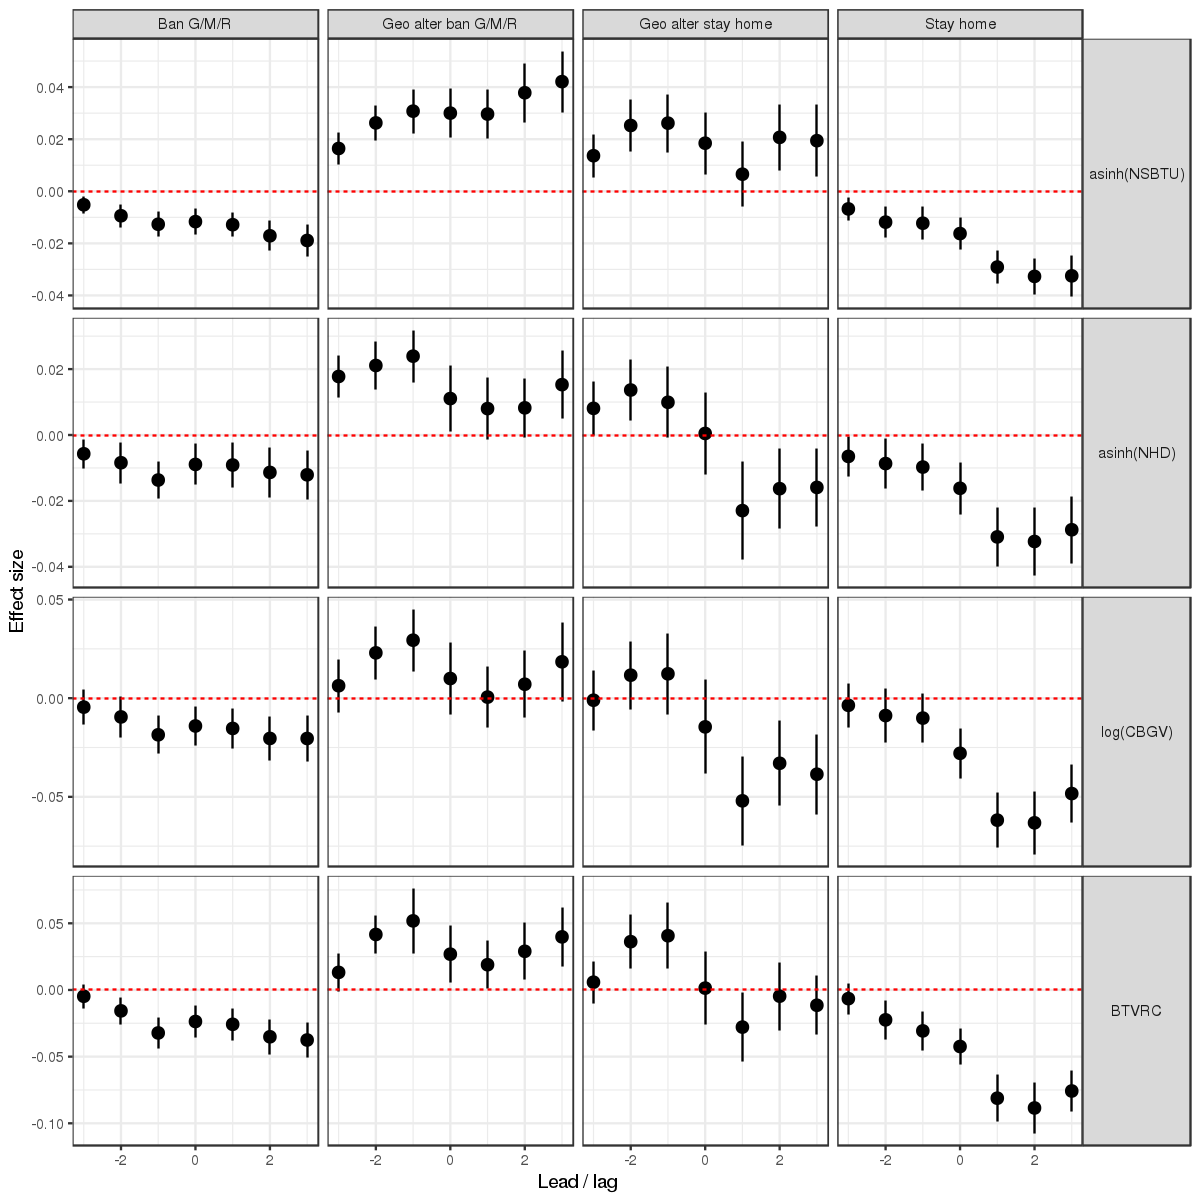

In [41]:
models = list(ll_DID.mp_go.aITT.sg_rstu, ll_DID.mp_go.aITT.sg_hd, 
              ll_DID.mp_go.aITT.sg_cbgv, ll_DID.mp_go.aITT.sg_btvrc)
vcovs = list(ll_out_rstu_aitt_sg_go$vcov.both, ll_out_hd_aitt_sg_go$vcov.both, 
             ll_out_cbgv_aitt_sg_go$vcov.both, ll_out_btvrc_aitt_sg_go$vcov.both)
outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

stay_home_index = 4
bgmr_index = 11
geo_sh_index = 18
geo_gmr_index = 25
lead_lag_length = 3
n_outcomes = 4

ll_df_geo_alters <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])
    se <- sqrt(diag(vcovs[[i]]))
    coef_df <- c(get_lead_and_lags(coefs, stay_home_index, lead_lag_length),
                 get_lead_and_lags(coefs, bgmr_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_sh_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_gmr_index, lead_lag_length)
                )

    te_df <- c(model_coefs.total_effect(coefs, "stay_home", lead_lag_length),
               model_coefs.total_effect(coefs, "ban_gmr", lead_lag_length),
               model_coefs.total_effect(coefs, "geo_alter_sh", lead_lag_length),
               model_coefs.total_effect(coefs, "geo_alter_bgmr", lead_lag_length)
              )
    se_df <- c(get_lead_and_lags(se, stay_home_index, lead_lag_length),
                 get_lead_and_lags(se, bgmr_index, lead_lag_length),
                 get_lead_and_lags(se, geo_sh_index, lead_lag_length),
                 get_lead_and_lags(se, geo_gmr_index, lead_lag_length))
    tse_df <- c(var_coefs.total_effect(vcovs[[i]], "stay_home", lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], "ban_gmr", lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], "geo_alter_sh", lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], "geo_alter_bgmr", lead_lag_length)
              )
    policy_df <- c(rep('Stay home', 2*lead_lag_length + 1),
                   rep('Ban G/M/R', 2*lead_lag_length + 1),
                   rep('Geo alter stay home', 2*lead_lag_length + 1),
                   rep('Geo alter ban G/M/R', 2*lead_lag_length + 1))
    outcome_df <- rep(outcomes[i], n_outcomes*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), n_outcomes)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )
    plot_df
}

ll_df_geo_alters %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, ymin=lb, ymax=ub)) + 
  geom_pointrange() + facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')
ll_df_geo_alters %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, ymin=lb, ymax=ub)) + 
  geom_pointrange() + facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')

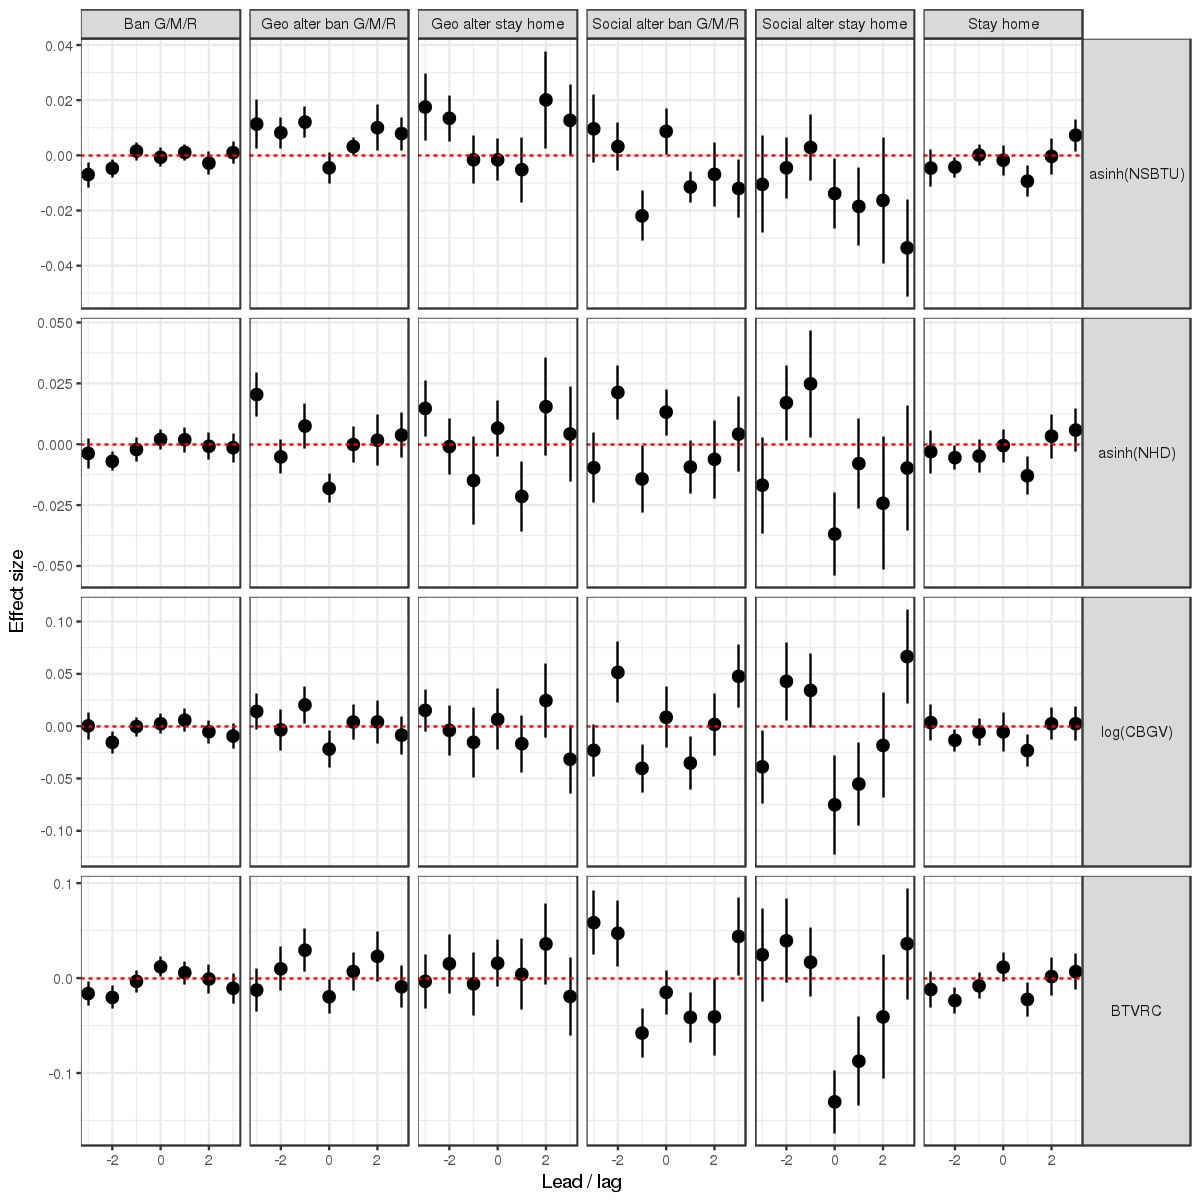

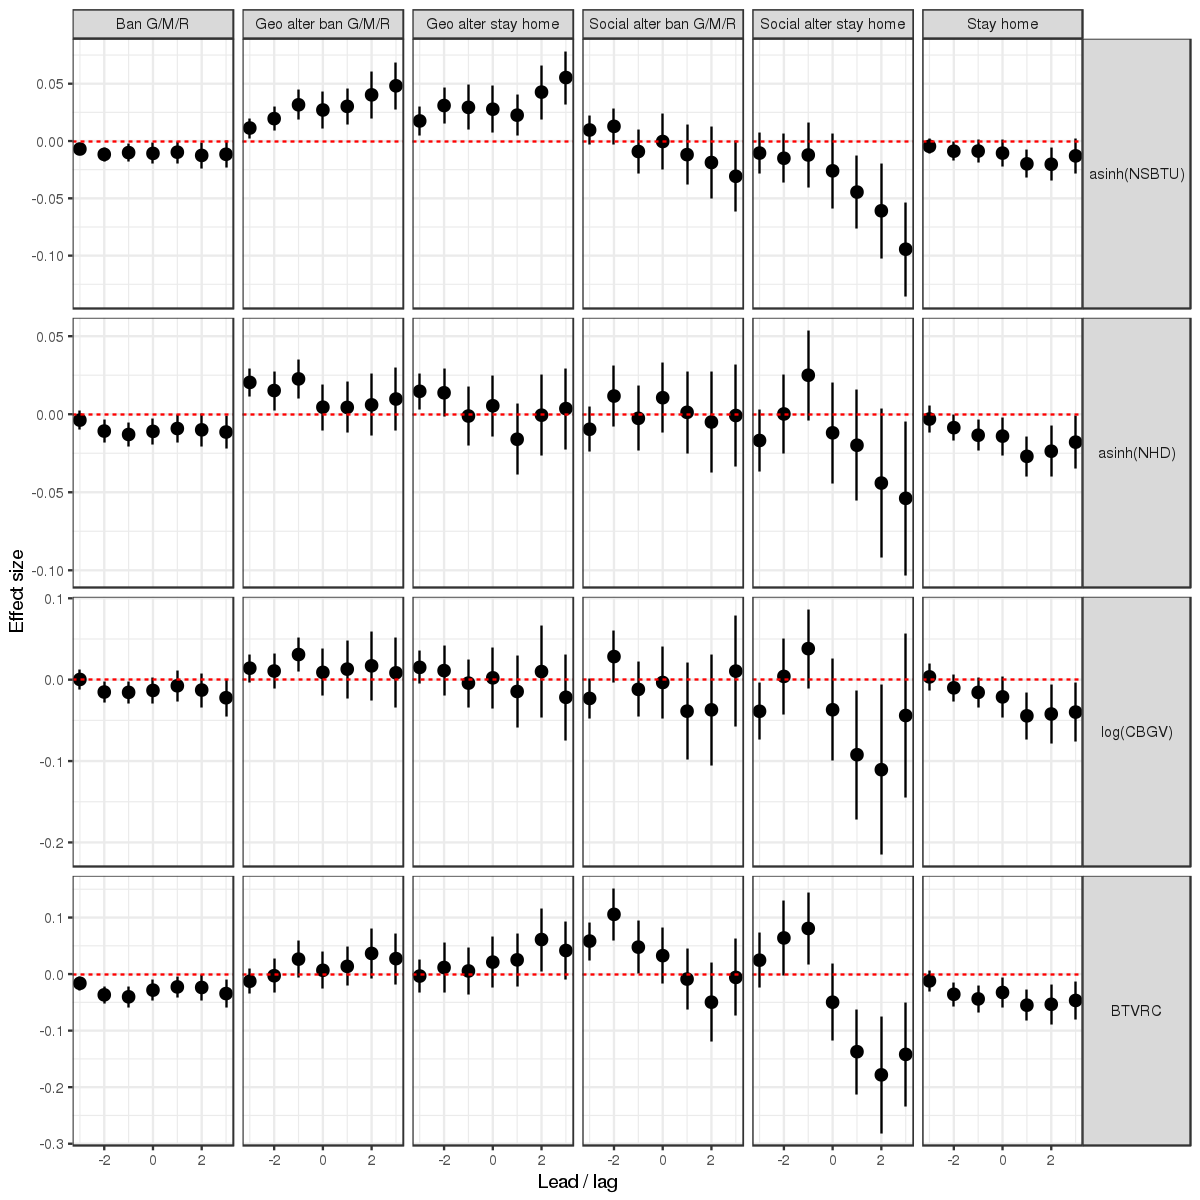

In [42]:
models = list(ll_DID.mp.aITT.sg_rstu, ll_DID.mp.aITT.sg_hd, 
              ll_DID.mp.aITT.sg_cbgv, ll_DID.mp.aITT.sg_btvrc)
vcovs = list(ll_out_rstu_aitt_sg$vcov.both, ll_out_hd_aitt_sg$vcov.both, 
             ll_out_cbgv_aitt_sg$vcov.both, ll_out_btvrc_aitt_sg$vcov.both)
outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

stay_home_index = 4
bgmr_index = 11
geo_sh_index = 18
geo_gmr_index = 25
alter_sh_index = 32
alter_gmr_index = 39
lead_lag_length = 3
n_outcomes = 6

ll_df_both_alters <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])
    se <- sqrt(diag(vcovs[[i]]))
    coef_df <- c(get_lead_and_lags(coefs, stay_home_index, lead_lag_length),
                 get_lead_and_lags(coefs, bgmr_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_sh_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_gmr_index, lead_lag_length),
                 get_lead_and_lags(coefs, alter_sh_index, lead_lag_length),
                 get_lead_and_lags(coefs, alter_gmr_index, lead_lag_length)
                )
    te_df <- c(model_coefs.total_effect(coefs, "stay_home", lead_lag_length),
           model_coefs.total_effect(coefs, "ban_gmr", lead_lag_length),
           model_coefs.total_effect(coefs, "geo_alter_sh", lead_lag_length),
           model_coefs.total_effect(coefs, "geo_alter_bgmr", lead_lag_length),
           model_coefs.total_effect(coefs, "alter_sh", lead_lag_length),
           model_coefs.total_effect(coefs, "alter_bgmr", lead_lag_length)              
          )
    se_df <- c(get_lead_and_lags(se, stay_home_index, lead_lag_length),
                 get_lead_and_lags(se, bgmr_index, lead_lag_length),
                 get_lead_and_lags(se, geo_sh_index, lead_lag_length),
                 get_lead_and_lags(se, geo_gmr_index, lead_lag_length),
               get_lead_and_lags(se, alter_sh_index, lead_lag_length),
                 get_lead_and_lags(se, alter_gmr_index, lead_lag_length))
    tse_df <- c(var_coefs.total_effect(vcovs[[i]], "stay_home", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "ban_gmr", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "geo_alter_sh", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "geo_alter_bgmr", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "alter_sh", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "alter_bgmr", lead_lag_length)
          )
    policy_df <- c(rep('Stay home', 2*lead_lag_length + 1),
                   rep('Ban G/M/R', 2*lead_lag_length + 1),
                   rep('Geo alter stay home', 2*lead_lag_length + 1),
                   rep('Geo alter ban G/M/R', 2*lead_lag_length + 1),
                   rep('Social alter stay home', 2*lead_lag_length + 1),
                   rep('Social alter ban G/M/R', 2*lead_lag_length + 1)
                  )
    outcome_df <- rep(outcomes[i], n_outcomes*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), n_outcomes)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )
    
    plot_df
}

ll_df_both_alters %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, ymin=lb, ymax=ub)) + 
  geom_pointrange() + facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')
ll_df_both_alters %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, ymin=lb, ymax=ub)) + 
  geom_pointrange() + facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')

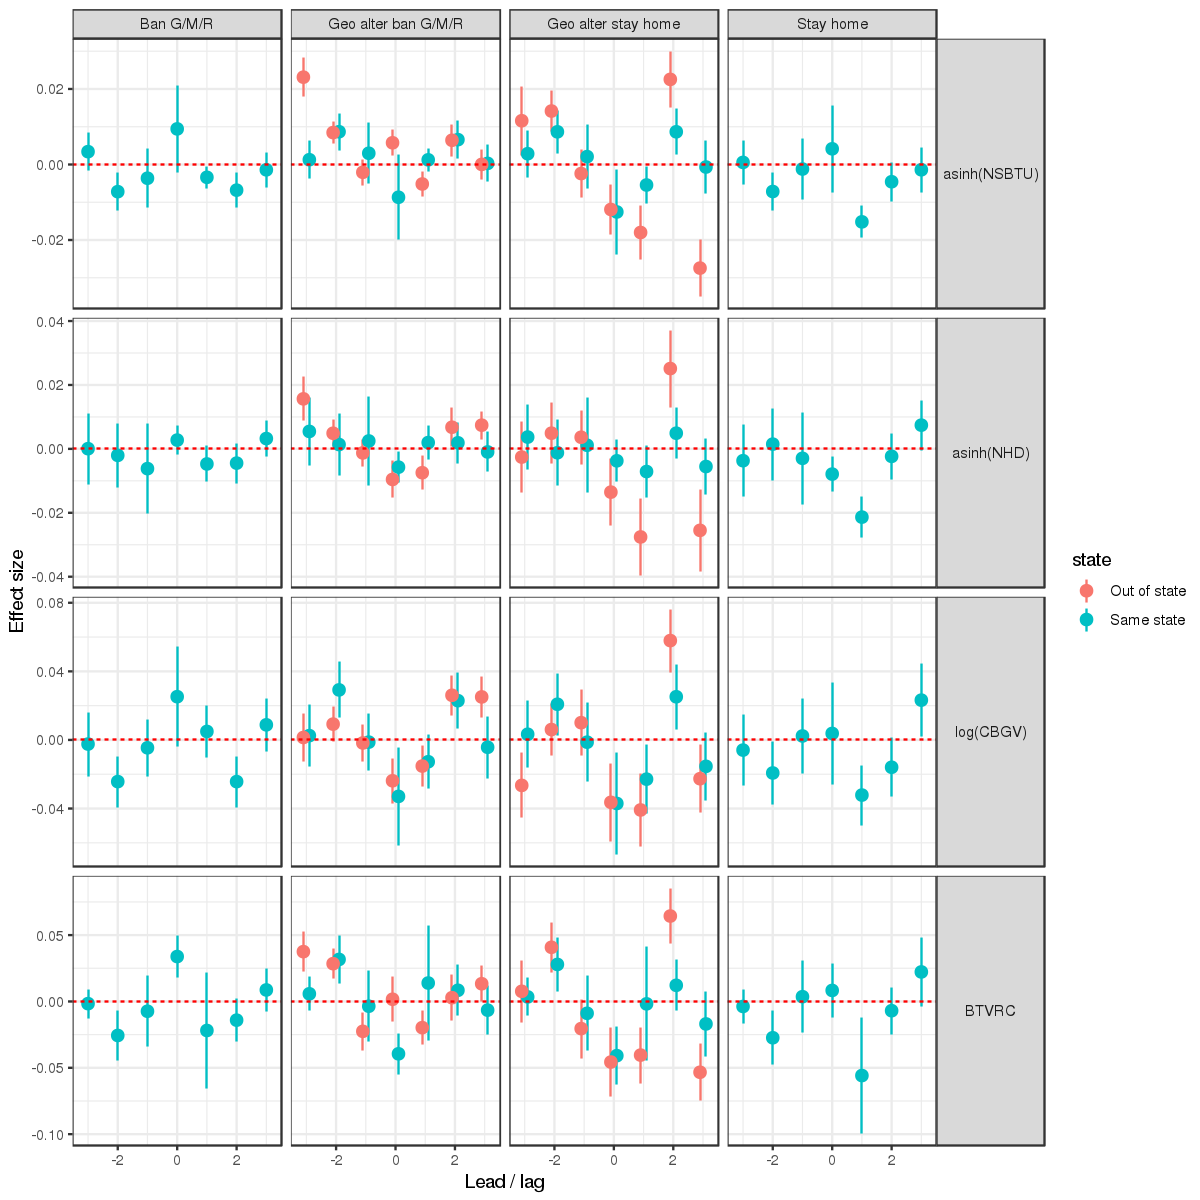

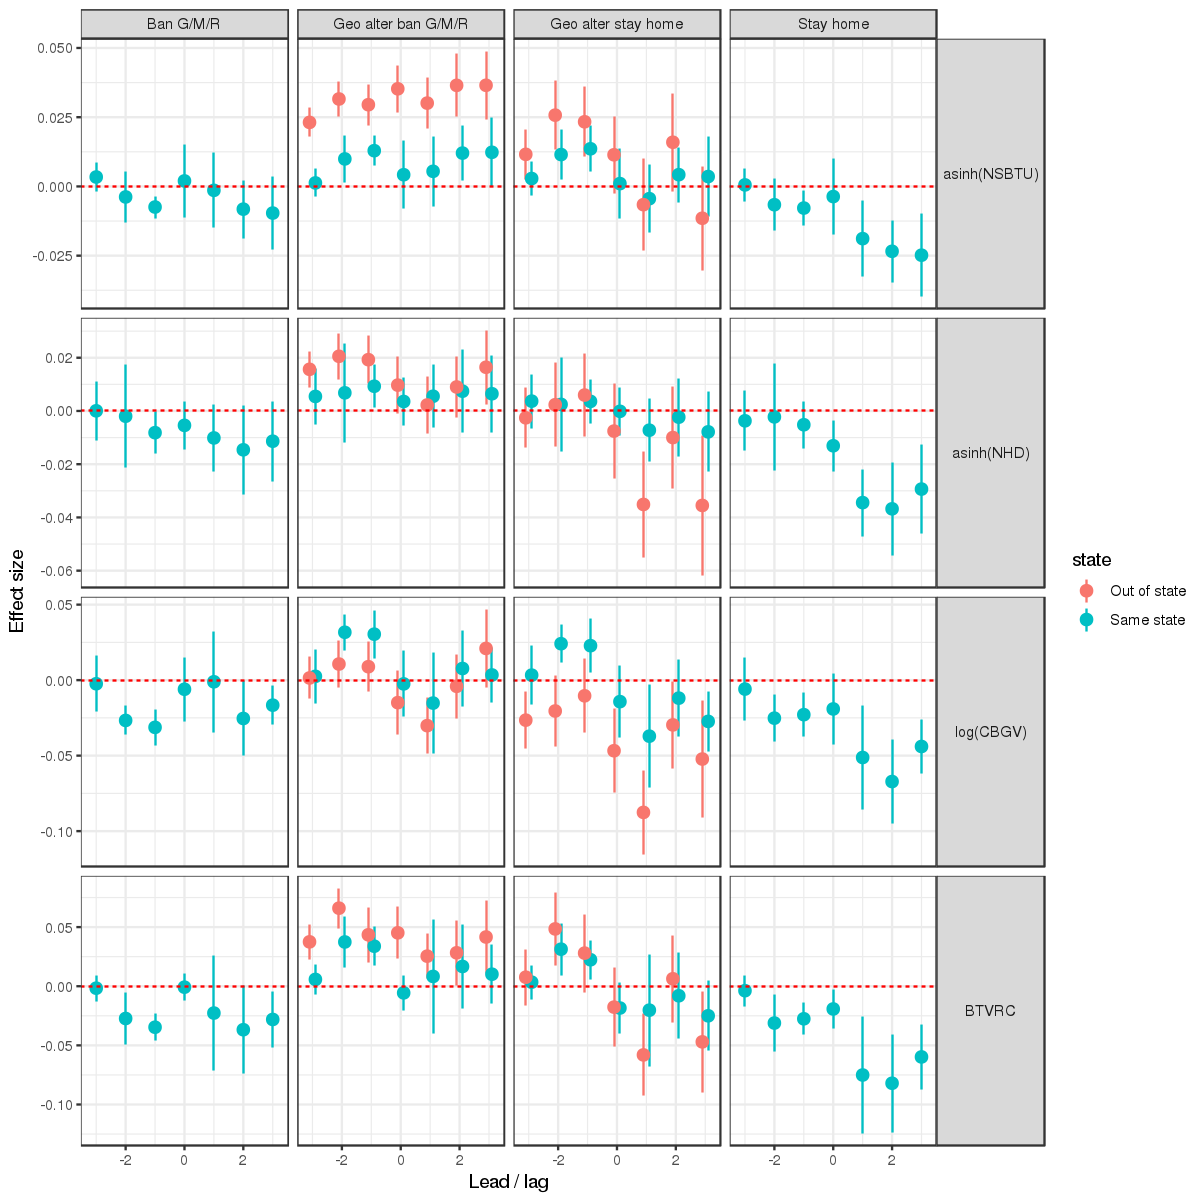

In [43]:
models = list(ll_did_fbrnstu_geo_split, ll_did_sgnhd_geo_split, 
              ll_did_sgcbgv_geo_split, ll_did_btvrc_geo_split)
vcovs = list(ll_out_fbrnstu_geo_split$vcov.both, ll_out_sgnhd_geo_split$vcov.both, 
             ll_out_sgcbgv_geo_split$vcov.both, ll_out_btvrc_geo_split$vcov.both)
outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

stay_home_index = 4
bgmr_index = 11
geo_sh_same_index = 18 # geo_alter_sh_same_state 
geo_gmr_same_index = 25 # geo_alter_ban_gmr_same_state 
geo_sh_diff_index = 32 # geo_alter_sh_diff_state 
geo_gmr_diff_index = 39 # geo_alter_ban_gmr_diff_state 
lead_lag_length = 3
n_outcomes = 6

ll_df_geo_split_alters <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])
    se <- sqrt(diag(vcovs[[i]]))
    coef_df <- c(get_lead_and_lags(coefs, stay_home_index, lead_lag_length),
                 get_lead_and_lags(coefs, bgmr_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_sh_same_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_gmr_same_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_sh_diff_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_gmr_diff_index, lead_lag_length)
                )
    se_df <- c(get_lead_and_lags(se, stay_home_index, lead_lag_length),
               get_lead_and_lags(se, bgmr_index, lead_lag_length),
               get_lead_and_lags(se, geo_sh_same_index, lead_lag_length),
               get_lead_and_lags(se, geo_gmr_same_index, lead_lag_length),
               get_lead_and_lags(se, geo_sh_diff_index, lead_lag_length),
               get_lead_and_lags(se, geo_gmr_diff_index, lead_lag_length))
    te_df <- c(model_coefs.total_effect(coefs, "stay_home", lead_lag_length),
          model_coefs.total_effect(coefs, "ban_gmr", lead_lag_length),
          model_coefs.total_effect(coefs, "geo_alter_sh_same_state", lead_lag_length),
          model_coefs.total_effect(coefs, "geo_alter_ban_gmr_same_state", lead_lag_length),
          model_coefs.total_effect(coefs, "geo_alter_sh_diff_state", lead_lag_length),
          model_coefs.total_effect(coefs, "geo_alter_ban_gmr_diff_state", lead_lag_length)              
          )
    tse_df <- c(var_coefs.total_effect(vcovs[[i]], "stay_home", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "ban_gmr", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "geo_alter_sh_same_state", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "geo_alter_ban_gmr_same_state", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "geo_alter_sh_diff_state", lead_lag_length),
           var_coefs.total_effect(vcovs[[i]], "geo_alter_ban_gmr_diff_state", lead_lag_length)
          )

    policy_df <- c(rep('Stay home', 2*lead_lag_length + 1),
                   rep('Ban G/M/R', 2*lead_lag_length + 1),
                   rep('Geo alter stay home', 2*lead_lag_length + 1),
                   rep('Geo alter ban G/M/R', 2*lead_lag_length + 1),
                   rep('Geo alter stay home', 2*lead_lag_length + 1),
                   rep('Geo alter ban G/M/R', 2*lead_lag_length + 1)
                  )
    state_df <- c(rep('Same state', 4*(2*lead_lag_length + 1)),
                  rep('Out of state', 2*(2*lead_lag_length + 1)))
    outcome_df <- rep(outcomes[i], n_outcomes*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), n_outcomes)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          state = state_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )
    
    plot_df
}

ll_df_geo_split_alters %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')
ll_df_geo_split_alters %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')

In [44]:
models = list(ll_did_fbrnstu_geo_split, ll_did_sgnhd_geo_split, 
              ll_did_sgcbgv_geo_split, ll_did_btvrc_geo_split)
vcovs = list(ll_out_fbrnstu_geo_split$vcov.both, ll_out_sgnhd_geo_split$vcov.both, 
             ll_out_sgcbgv_geo_split$vcov.both, ll_out_btvrc_geo_split$vcov.both)
outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

generate_indices <- function(index, length) {
    seq((index-length),(index+length), 1)
}

combine_coefs <- function(index_one, index_two, model) {
    coefs <- coef(model)
    coefs_total <- coefs[index_one] + coefs[index_two]
    coefs_total
}

combine_ses <- function(index_one, index_two, vcov) {
    
    matrix_indices <- rbind(index_one, index_two)
    
    vcov_comb <- diag(vcov)[index_one] + diag(vcov)[index_two]
    foreach(i=1:length(index_one)) %do% {
        vcov_comb[i] = vcov_comb[i] + 2*vcov[index_one[i], index_two[i]]
    }
    sqrt(vcov_comb)
    
}

stay_home_index = 4
bgmr_index = 11
geo_sh_same_index = 18 # geo_alter_sh_same_state 
geo_gmr_same_index = 25 # geo_alter_ban_gmr_same_state
geo_sh_diff_index = 32 # geo_alter_sh_diff_state 
geo_gmr_diff_index = 39 # geo_alter_ban_gmr_diff_state
lead_lag_length = 3
n_outcomes = 6


stay_home_indices <- generate_indices(stay_home_index, lead_lag_length) 
bgmr_indices <- generate_indices(bgmr_index, lead_lag_length)
geo_sh_same_indices <- generate_indices(geo_sh_same_index, lead_lag_length)
geo_gmr_same_indices <- generate_indices(geo_gmr_same_index, lead_lag_length)
geo_sh_diff_indices <- generate_indices(geo_sh_diff_index, lead_lag_length)
geo_gmr_diff_indices <- generate_indices(geo_gmr_diff_index, lead_lag_length)

ll_df_geo_split_combine_df <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])
    in_state_sh_coefs <- combine_coefs(stay_home_indices, geo_sh_same_indices, models[[i]])
    out_state_sh_coefs <- get_lead_and_lags(coef(models[[i]]), geo_sh_diff_index, lead_lag_length)
    in_state_gmr_coefs <- combine_coefs(bgmr_indices, geo_gmr_same_indices, models[[i]])
    out_state_gmr_coefs <- get_lead_and_lags(coef(models[[i]]), geo_gmr_diff_index, lead_lag_length)
    
    in_state_sh_se <- combine_ses(stay_home_indices, geo_sh_same_indices, vcovs[[i]])
    out_state_sh_se <- get_lead_and_lags(sqrt(diag(vcovs[[i]])), geo_sh_diff_index, lead_lag_length)
    in_state_gmr_se <- combine_ses(bgmr_indices, geo_gmr_same_indices, vcovs[[i]])
    out_state_gmr_se <- get_lead_and_lags(sqrt(diag(vcovs[[i]])), geo_gmr_diff_index, lead_lag_length)
    
    coef_df <- c(in_state_sh_coefs,
                 out_state_sh_coefs,
                 in_state_gmr_coefs,
                 out_state_gmr_coefs)
    se_df <- c(in_state_sh_se,
               out_state_sh_se,
               in_state_gmr_se,
               out_state_gmr_se)
    te_df <- c(model_coefs.total_effect(coefs, c("stay_home", "geo_alter_sh_same_state"), lead_lag_length),
               model_coefs.total_effect(coefs, "geo_alter_sh_diff_state", lead_lag_length),
               model_coefs.total_effect(coefs, c("ban_gmr", "geo_alter_ban_gmr_same_state"), lead_lag_length),
               model_coefs.total_effect(coefs, "geo_alter_ban_gmr_diff_state", lead_lag_length)
               )
    tse_df <- c(var_coefs.total_effect(vcovs[[i]], c("stay_home", "geo_alter_sh_same_state"), lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], "geo_alter_sh_diff_state", lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], c("ban_gmr", "geo_alter_ban_gmr_same_state"), lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], "geo_alter_ban_gmr_diff_state", lead_lag_length)
                )
    policy_df <- c(rep('Stay home', 2*(2*lead_lag_length + 1)),
                   rep('Ban G/M/R', 2*(2*lead_lag_length + 1)))
    
    state_df <- rep(c(rep('Same state', (2*lead_lag_length + 1)),
                  rep('Out of state', (2*lead_lag_length + 1))),2)
    outcome_df <- rep(outcomes[i], 4*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), 4)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          state = state_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )
}

dd_leads_lags_state_geo <- ll_df_geo_split_combine_df %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0), legend.position='bottom') + 
xlab('Lead / lag') + ylab('Effect size') + labs(color = 'State')

dd_leads_lags_state_geo_total_effects <- ll_df_geo_split_combine_df %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0), legend.position='bottom') + 
xlab('Lead / lag') + ylab('Effect size') + labs(color = 'State')

In [45]:
# Write plot to output
ggsave(
  paste0("../output/dd_leads_lags_state_geo.pdf"),
  plot = dd_leads_lags_state_geo,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 7,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

ggsave(
  paste0("../output/dd_leads_lags_state_geo_total_effects.pdf"),
  plot = dd_leads_lags_state_geo_total_effects,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 7,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

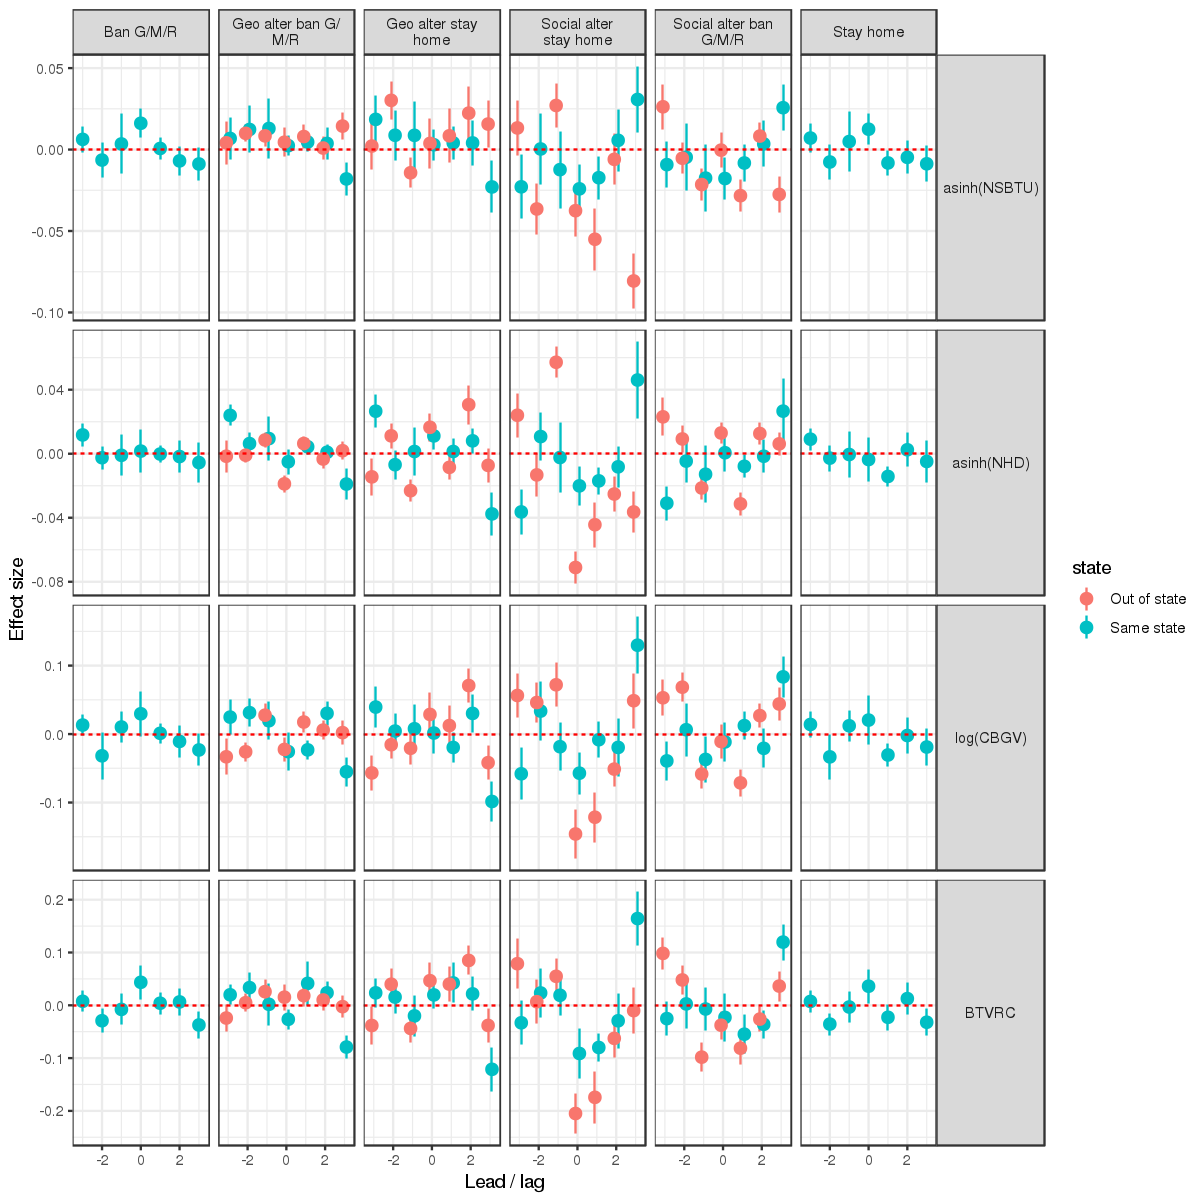

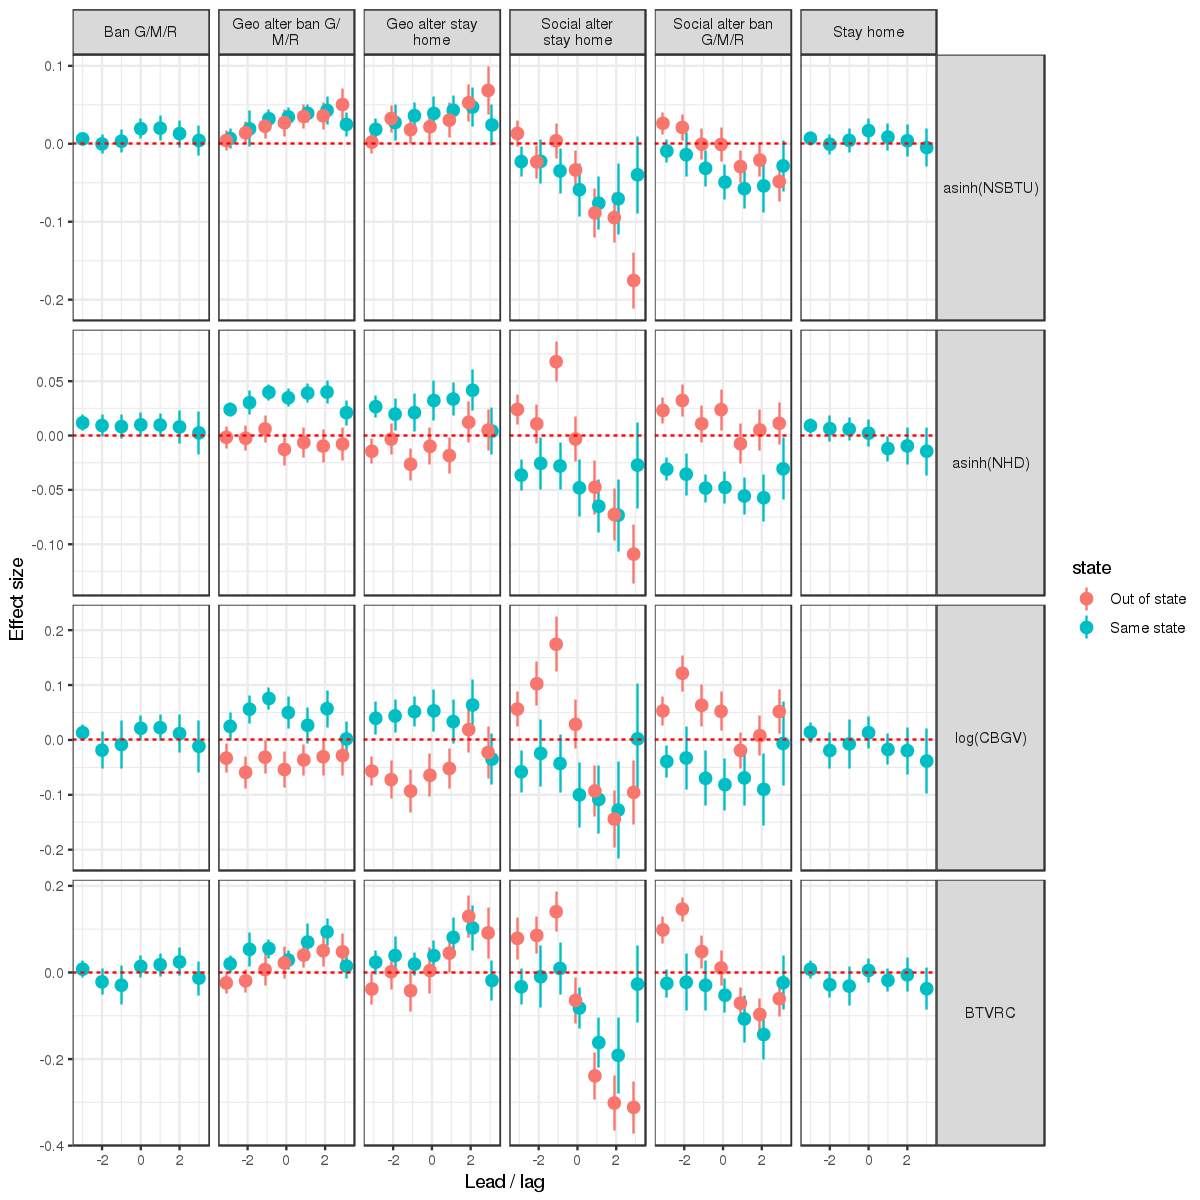

In [46]:
models = list(ll_did_fbrnstu_both_split, ll_did_sgnhd_both_split, 
              ll_did_sgcbgv_both_split, ll_did_btvrc_both_split)
vcovs = list(ll_out_sgnhd_both_split$vcov.both, ll_out_fbrnstu_both_split$vcov.both, 
             ll_out_sgcbgv_both_split$vcov.both, ll_out_btvrc_both_split$vcov.both)

outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

stay_home_index = 4
bgmr_index = 11
geo_sh_same_index = 18
geo_gmr_same_index = 25
geo_sh_diff_index = 32
geo_gmr_diff_index = 39
social_sh_same_index = 46
social_gmr_same_index = 53
social_sh_diff_index = 60
social_gmr_diff_index = 67
lead_lag_length = 3
n_outcomes = 10

ll_df_both_split_alters <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])
    se <- sqrt(diag(vcovs[[i]]))
    
    coef_df <- c(get_lead_and_lags(coefs, stay_home_index, lead_lag_length),
                 get_lead_and_lags(coefs, bgmr_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_sh_same_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_gmr_same_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_sh_diff_index, lead_lag_length),
                 get_lead_and_lags(coefs, geo_gmr_diff_index, lead_lag_length),
                 get_lead_and_lags(coefs, social_sh_same_index, lead_lag_length),
                 get_lead_and_lags(coefs, social_gmr_same_index, lead_lag_length),
                 get_lead_and_lags(coefs, social_sh_diff_index, lead_lag_length),
                 get_lead_and_lags(coefs, social_gmr_diff_index, lead_lag_length)
                )
    se_df <- c(get_lead_and_lags(se, stay_home_index, lead_lag_length),
               get_lead_and_lags(se, bgmr_index, lead_lag_length),
               get_lead_and_lags(se, geo_sh_same_index, lead_lag_length),
               get_lead_and_lags(se, geo_gmr_same_index, lead_lag_length),
               get_lead_and_lags(se, geo_sh_diff_index, lead_lag_length),
               get_lead_and_lags(se, geo_gmr_diff_index, lead_lag_length),
               get_lead_and_lags(se, social_sh_same_index, lead_lag_length),
               get_lead_and_lags(se, social_gmr_same_index, lead_lag_length),
               get_lead_and_lags(se, social_sh_diff_index, lead_lag_length),
               get_lead_and_lags(se, social_gmr_diff_index, lead_lag_length))
    
    te_df <- c(model_coefs.total_effect(coefs, names(coefs)[[stay_home_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[bgmr_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[geo_sh_same_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[geo_gmr_same_index]], lead_lag_length),
               
               model_coefs.total_effect(coefs, names(coefs)[[geo_sh_diff_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[geo_gmr_diff_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[social_sh_same_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[social_gmr_same_index]], lead_lag_length),

               model_coefs.total_effect(coefs, names(coefs)[[social_sh_diff_index]], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[[social_gmr_diff_index]], lead_lag_length)
               )
    row.names(vcovs[[i]]) <- names(coefs)
    colnames(vcovs[[i]]) <- names(coefs)
    tse_df <- c(var_coefs.total_effect(vcovs[[i]], names(coefs)[[stay_home_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[bgmr_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[geo_sh_same_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[geo_gmr_same_index]], lead_lag_length),
                
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[geo_sh_diff_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[geo_gmr_diff_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[social_sh_same_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[social_gmr_same_index]], lead_lag_length),

                var_coefs.total_effect(vcovs[[i]], names(coefs)[[social_sh_diff_index]], lead_lag_length),
                var_coefs.total_effect(vcovs[[i]], names(coefs)[[social_gmr_diff_index]], lead_lag_length)
                )
    
    policy_df <- c(rep('Stay home', 2*lead_lag_length + 1),
                   rep('Ban G/M/R', 2*lead_lag_length + 1),
                   rep('Geo alter stay home', 2*lead_lag_length + 1),
                   rep('Geo alter ban G/M/R', 2*lead_lag_length + 1),
                   rep('Geo alter stay home', 2*lead_lag_length + 1),
                   rep('Geo alter ban G/M/R', 2*lead_lag_length + 1),
                   rep('Social alter stay home', 2*lead_lag_length + 1),
                   rep('Social alter ban G/M/R', 2*lead_lag_length + 1),
                   rep('Social alter stay home', 2*lead_lag_length + 1),
                   rep('Social alter ban G/M/R', 2*lead_lag_length + 1)
                  )
    state_df <- c(rep('Same state', 4*(2*lead_lag_length + 1)),
                  rep('Out of state', 2*(2*lead_lag_length + 1)),
                  rep('Same state', 2*(2*lead_lag_length + 1)),
                  rep('Out of state', 2*(2*lead_lag_length + 1))
                 )
    outcome_df <- rep(outcomes[i], n_outcomes*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), n_outcomes)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          state = state_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )
#    print(plot_df[c("coef", "total_coef", "se", "total_se")])
    plot_df
}

ll_df_both_split_alters %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ str_wrap(policy, 16), scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')

ll_df_both_split_alters %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ str_wrap(policy, 16), scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0)) + xlab('Lead / lag') + ylab('Effect size')

In [51]:
models = list(ll_did_fbrnstu_both_split, ll_did_sgnhd_both_split, 
              ll_did_sgcbgv_both_split, ll_did_btvrc_both_split)
vcovs = list(ll_out_sgnhd_both_split$vcov.both, ll_out_fbrnstu_both_split$vcov.both, 
             ll_out_sgcbgv_both_split$vcov.both, ll_out_btvrc_both_split$vcov.both)
outcomes = c('asinh(NSBTU)', 'asinh(NHD)', 'log(CBGV)', 'BTVRC')

combine_coefs_three <- function(index_one, index_two, index_three, model) {
    coefs <- coef(model)
    coefs_total <- coefs[index_one] + coefs[index_two] + coefs[index_three]
    coefs_total
}

combine_ses_three <- function(index_one, index_two, index_three, vcov) {
    
    matrix_indices <- rbind(index_one, index_two)
    
    vcov_comb <- diag(vcov)[index_one] + diag(vcov)[index_two] + diag(vcov)[index_three]
    foreach(i=1:length(index_one)) %do% {
        vcov_comb[i] = vcov_comb[i] + 2*vcov[index_one[i], index_two[i]] + 
        2*vcov[index_one[i], index_three[i]] + 2*vcov[index_two[i], index_three[i]]
    }
    sqrt(vcov_comb)
}

stay_home_index = 4
bgmr_index = 11
geo_sh_same_index = 18
geo_gmr_same_index = 25
geo_sh_diff_index = 32
geo_gmr_diff_index = 39
social_sh_same_index = 46
social_gmr_same_index = 53
social_sh_diff_index = 60
social_gmr_diff_index = 67
lead_lag_length = 3
n_outcomes = 10

stay_home_indices <- generate_indices(stay_home_index, lead_lag_length) 
bgmr_indices <- generate_indices(bgmr_index, lead_lag_length)
geo_sh_same_indices <- generate_indices(geo_sh_same_index, lead_lag_length)
geo_gmr_same_indices <- generate_indices(geo_gmr_same_index, lead_lag_length)
geo_sh_diff_indices <- generate_indices(geo_sh_diff_index, lead_lag_length)
geo_gmr_diff_indices <- generate_indices(geo_gmr_diff_index, lead_lag_length)
social_sh_same_indices <- generate_indices(social_sh_same_index, lead_lag_length)
social_gmr_same_indices <- generate_indices(social_gmr_same_index, lead_lag_length)
social_sh_diff_indices <- generate_indices(social_sh_diff_index, lead_lag_length)
social_gmr_diff_indices <- generate_indices(social_gmr_diff_index, lead_lag_length)

ll_df_both_split_combine_df <- foreach(i=1:length(models), .combine=rbind) %do% {
    coefs <- coef(models[[i]])

    in_state_sh_coefs <- combine_coefs_three(stay_home_indices, geo_sh_same_indices, social_sh_same_indices,
                                             models[[i]])
    out_state_sh_coefs <- combine_coefs(geo_sh_diff_indices, social_sh_diff_indices, models[[i]])
    in_state_gmr_coefs <- combine_coefs_three(bgmr_indices, geo_gmr_same_indices, social_gmr_same_indices,
                                              models[[i]])
    out_state_gmr_coefs <- combine_coefs(geo_gmr_diff_indices, social_gmr_diff_indices, models[[i]])
    
    in_state_sh_se <- combine_ses_three(stay_home_indices, geo_sh_same_indices, social_sh_same_indices,
                                        vcovs[[i]])
    out_state_sh_se <- combine_ses(social_sh_diff_indices, geo_sh_diff_indices, vcovs[[i]])
    in_state_gmr_se <- combine_ses_three(bgmr_indices, geo_gmr_same_indices, social_gmr_same_indices,
                                         vcovs[[i]])
    out_state_gmr_se <- combine_ses(social_gmr_diff_indices, geo_gmr_diff_indices, vcovs[[i]])
    
    coef_df <- c(in_state_sh_coefs,
                 out_state_sh_coefs,
                 in_state_gmr_coefs,
                 out_state_gmr_coefs)
    se_df <- c(in_state_sh_se,
               out_state_sh_se,
               in_state_gmr_se,
               out_state_gmr_se)
    te_df <- c(model_coefs.total_effect(coefs, names(coefs)[c(stay_home_index, geo_sh_same_index, social_sh_same_index)], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[c(geo_sh_diff_index, social_sh_diff_index)], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[c(bgmr_index, geo_gmr_same_index, social_gmr_same_index)], lead_lag_length),
               model_coefs.total_effect(coefs, names(coefs)[c(geo_gmr_diff_index, social_gmr_diff_index)], lead_lag_length)
               )
    row.names(vcovs[[i]]) <- names(coefs)
    colnames(vcovs[[i]]) <- names(coefs)
    tse_df <- c(
               var_coefs.total_effect(vcovs[[i]], names(coefs)[c(stay_home_index, geo_sh_same_index, social_sh_same_index)], lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], names(coefs)[c(geo_sh_diff_index, social_sh_diff_index)], lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], names(coefs)[c(bgmr_index, geo_gmr_same_index, social_gmr_same_index)], lead_lag_length),
               var_coefs.total_effect(vcovs[[i]], names(coefs)[c(geo_gmr_diff_index, social_gmr_diff_index)], lead_lag_length)
                )

    
    policy_df <- c(rep('Stay home', 2*(2*lead_lag_length + 1)),
                   rep('Ban G/M/R', 2*(2*lead_lag_length + 1)))
    
    state_df <- rep(c(rep('Same state', (2*lead_lag_length + 1)),
                  rep('Out of state', (2*lead_lag_length + 1))),2)
    outcome_df <- rep(outcomes[i], 4*(2*lead_lag_length + 1))
    lead_lag_df = rep(seq((-1*lead_lag_length), lead_lag_length, 1), 4)
    
    plot_df <- data.frame(coef = coef_df,
                          se = se_df,
                          policy = policy_df,
                          outcome = outcome_df,
                          lead_lag = lead_lag_df,
                          state = state_df,
                          total_coef = te_df,
                          total_se = tse_df
                         )                                       
                                            
#        print(plot_df[c("coef", "total_coef", "se", "total_se")])
}

dd_leads_lags_state_geo_social <- ll_df_both_split_combine_df %>% 
  mutate(lb = coef-1.96*se,
         ub = coef+1.96*se) %>% 
  ggplot(., aes(x=lead_lag, y=coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0), legend.position='bottom') + 
xlab('Lead / lag') + ylab('Effect size') + labs(color='State')

dd_leads_lags_state_geo_social_total_effects <- ll_df_both_split_combine_df %>% 
  mutate(lb = total_coef-1.96*total_se,
         ub = total_coef+1.96*total_se) %>% 
  ggplot(., aes(x=lead_lag, y=total_coef, color=state, ymin=lb, ymax=ub)) + 
  geom_pointrange(position = position_dodge(width = .4)) + 
  facet_grid(outcome ~ policy, scales='free_y') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  theme(strip.text.y = element_text(angle=0), legend.position='bottom') + 
xlab('Lead / lag') + ylab('Effect size') + labs(color='State')

In [52]:
# Write plot to output
ggsave(
  paste0("../output/dd_leads_lags_state_geo_social.pdf"),
  plot = dd_leads_lags_state_geo_social,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 7,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

# Write plot to output
ggsave(
  paste0("../output/dd_leads_lags_state_geo_social_total_effects.pdf"),
  plot = dd_leads_lags_state_geo_social_total_effects,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 5,
  height = 7,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

In [49]:
# Used the code below as scrap to pull out coefficients used to insert numbers into paper.

In [ ]:
rbind(plot_df %>% mutate(subject = 'Own state',
                         model = 'No spillovers') %>% 
      dplyr::select(-outcome_source, -outcome_type),
      plot_df_spillovers_diff %>% 
      mutate(subject = ifelse(subject == 'Own state', 'Own state', 'Other states'),
             model = "Geo spillovers only") %>% 
      dplyr::select(-outcome_source, -outcome_type),
      plot_df_spillovers_diff_both_total_combine %>% 
      mutate(model = 'Geo and social spillovers')) %>%
      mutate(lb = coef - 1.96*sqrt(var),
             ub = coef + 1.96*sqrt(var)) %>% 
      mutate(coef = ifelse(log == 1, exp(coef) - 1, coef),
             lb = ifelse(log == 1, exp(lb) - 1, lb),
             ub = ifelse(log == 1, exp(ub) - 1, ub)) %>%
     mutate(policy = factor(policy, ordered=TRUE, levels=c('Close gyms,\nmovie theaters,\nrestaurants',
                                                           'Shelter-in-place'))) %>% 
     mutate(
         outcome_type = outcome_types[outcome],
         outcome_source = get_outcome_source(as.character(outcome))
           ) %>% 
filter(outcome_source == 'Safegraph') %>% filter(!(model == 'No spillovers')) %>%
filter(policy == 'Shelter-in-place') %>% filter(subject == 'Other states') %>%arrange(outcome, model)